 # **Librairie chez Lapage**

# Partie 2 : Analyse des ventes de la librairie

In [698]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import seaborn as sn
import datetime
from datetime import datetime
from datetime import date

## Fonctions

In [699]:
def histogram(df):
    return df.hist(figsize=(20,8))

In [700]:
def matrix(df):
    pd.plotting.scatter_matrix((df), alpha=0.2)
    return matrix

## Importation du df_final et traitement

In [701]:
df_final = pd.read_csv(r'C:\Users\melle\FORMATION\P6_Mendy\P6_DF_FINAL.csv')
df_final.head()

,Unnamed: 0,client_id,birth,sex,age,id_prod,price,categ,session_id,date_longue,date_courte,date_année
0,0,c_4410,1967.0,f,55.0,0_1316,7.2,0.0,s_141762,2021-12-29,2021-12-01,2021-01-01
1,1,c_4410,1967.0,f,55.0,0_1316,7.2,0.0,s_186233,2022-03-29,2022-03-01,2022-01-01
2,2,c_4410,1967.0,f,55.0,0_1316,7.2,0.0,s_215758,2022-05-29,2022-05-01,2022-01-01
3,3,c_3654,1978.0,f,44.0,0_1316,7.2,0.0,s_125143,2021-11-26,2021-11-01,2021-01-01
4,4,c_3654,1978.0,f,44.0,0_1316,7.2,0.0,s_258546,2022-08-26,2022-08-01,2022-01-01


In [702]:
df_final = df_final.drop('Unnamed: 0',1)

C:\Users\melle\AppData\Local\Temp/ipykernel_5832/1045252126.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_final = df_final.drop('Unnamed: 0',1)


In [703]:
df_final.shape

(679332, 11)

In [704]:
df_final.dtypes

client_id       object
birth          float64
sex             object
age            float64
id_prod         object
price          float64
categ          float64
session_id      object
date_longue     object
date_courte     object
date_année      object
dtype: object

In [705]:
client = [ 'birth' ,'age', 'categ']
for var in client:
    df_final[var] = df_final[var].astype(int)

In [706]:
temps = [ 'date_longue' ,'date_courte', 'date_année']
for var in temps:
    df_final[var] = df_final[var].astype("datetime64[ns]")

In [707]:
df_final.dtypes

client_id              object
birth                   int32
sex                    object
age                     int32
id_prod                object
price                 float64
categ                   int32
session_id             object
date_longue    datetime64[ns]
date_courte    datetime64[ns]
date_année     datetime64[ns]
dtype: object

In [708]:
# Création calendrier par semaine
df_final.date_longue.dt.isocalendar().week
df_final["num_semaine"] = df_final.date_longue.dt.isocalendar().week

In [709]:
df_final.isna().sum().sum()

0

In [710]:
df_final.head()

,client_id,birth,sex,age,id_prod,price,categ,session_id,date_longue,date_courte,date_année,num_semaine
0,c_4410,1967,f,55,0_1316,7.2,0,s_141762,2021-12-29,2021-12-01,2021-01-01,52
1,c_4410,1967,f,55,0_1316,7.2,0,s_186233,2022-03-29,2022-03-01,2022-01-01,13
2,c_4410,1967,f,55,0_1316,7.2,0,s_215758,2022-05-29,2022-05-01,2022-01-01,21
3,c_3654,1978,f,44,0_1316,7.2,0,s_125143,2021-11-26,2021-11-01,2021-01-01,47
4,c_3654,1978,f,44,0_1316,7.2,0,s_258546,2022-08-26,2022-08-01,2022-01-01,34


In [711]:
df_final.head(2)

,client_id,birth,sex,age,id_prod,price,categ,session_id,date_longue,date_courte,date_année,num_semaine
0,c_4410,1967,f,55,0_1316,7.2,0,s_141762,2021-12-29,2021-12-01,2021-01-01,52
1,c_4410,1967,f,55,0_1316,7.2,0,s_186233,2022-03-29,2022-03-01,2022-01-01,13


In [712]:
df_final["num_semaine"] = df_final["num_semaine"].astype(int)

In [713]:
temps = ['date_courte', 'date_année']
for var in temps:

    df_final[var]= pd.to_datetime(df_final[var])

In [714]:
df_final['date_courte'] = df_final['date_longue'].dt.strftime(" %Y %m")
df_final['date_année'] = df_final['date_longue'].dt.strftime("%Y")

In [715]:
df_final.dtypes

client_id              object
birth                   int32
sex                    object
age                     int32
id_prod                object
price                 float64
categ                   int32
session_id             object
date_longue    datetime64[ns]
date_courte            object
date_année             object
num_semaine             int32
dtype: object

# Création des df de sous-groupes

## Le Client

### CA_client_id

In [716]:
CA_client_id =  df_final.groupby(by=["client_id"]).agg({"price":"sum"})
CA_client_id = CA_client_id.reset_index()
effectifs = df_final["client_id"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["price"]) # création du tableau à partir des modalités
CA_client_id["nombre de reccurence"] = effectifs.values
CA_client_id["price"] = CA_client_id["price"].round(2)
CA_client_id = CA_client_id.sort_values(by="price", ascending=False)
CA_client_id.head(3)

,client_id,price,nombre de reccurence
677,c_1609,324033.35,191
4388,c_4958,289760.34,50
6337,c_6714,153662.75,28


### panier_moyen_client_id / panier_moyen_categ

In [717]:
panier_moyen_client_id =  df_final.groupby(by=["client_id"]).agg({"price":"mean"})
panier_moyen_client_id = panier_moyen_client_id.reset_index() 
panier_moyen_client_id["price"] = panier_moyen_client_id["price"].round(2)

effectifs = df_final["client_id"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["price"]) # création du tableau à partir des modalités
panier_moyen_client_id["nombre de reccurence"] = effectifs.values
panier_moyen_client_id = panier_moyen_client_id.sort_values(by="price", ascending=True)
panier_moyen_client_id.head(3)

,client_id,price,nombre de reccurence
7918,c_8140,4.15,12
7798,c_8032,4.41,13
7889,c_8114,4.99,12


In [718]:
panier_moyen_categ=  df_final.groupby(by=["categ"]).agg({"price":"mean"})
panier_moyen_categ = panier_moyen_categ.reset_index() 
panier_moyen_categ["price"] = panier_moyen_categ["price"].round(2)


effectifs = df_final["categ"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["price"]) # création du tableau à partir des modalités
panier_moyen_categ["nombre de reccurence"] = effectifs.values
panier_moyen_categ = panier_moyen_categ.sort_values(by="price", ascending=True)
panier_moyen_categ.head(3)

,categ,price,nombre de reccurence
0,0,10.64,415680
1,1,20.49,227169
2,2,76.21,36483


### CA_age

In [719]:
CA_age = df_final.groupby(by="age").agg({"price":"sum","session_id":"count"}).round(2)
CA_age.reset_index(inplace=True)
effectifs = df_final["age"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["price"]) # création du tableau à partir des modalités
CA_age["nombre_de_reccurence"] = effectifs.values
CA_age = CA_age.sort_values(by="age", ascending=False)
CA_age = CA_age.rename(columns={"price":"CA"})
CA_age = CA_age.rename(columns={"session_id":"Visites"})
CA_age = CA_age.rename(columns={"nombre_de_reccurence":"Ventes"})
CA_age.head(3)

,age,CA,Visites,Ventes
75,93,3221.85,201,170
74,92,4013.87,226,201
73,91,2815.45,170,226


### CA_génération

In [720]:
df_final["génération"]=1
bins = [0,30,50,100]
labels = ["Moins de 30 ans","30-50 ans","51_et_plus" ]
df_final["génération"]=pd.cut(df_final["age"], bins, labels)

In [721]:
CA_génération_1=df_final.groupby("génération").agg({"price":"sum","session_id": lambda x: x.nunique(), "id_prod": lambda x: x.nunique()}).round(2)
CA_génération_1 = CA_génération_1.reset_index()

CA_génération_1 = CA_génération_1.rename(columns={"price":"CA"})
CA_génération_1 = CA_génération_1.rename(columns={"session_id":"Visites"})
CA_génération_1 = CA_génération_1.rename(columns={"id_prod":"Ventes"})
CA_génération_1

,génération,CA,Visites,Ventes
0,"(0, 30]",3294902.03,46219,2283
1,"(30, 50]",5538635.91,174603,3134
2,"(50, 100]",3022541.78,121493,2855


In [722]:
CA_par_client = df_final.groupby(by=["client_id","génération"]).agg({"price":"sum"})
CA_par_client = CA_par_client.reset_index()
CA_par_client

,client_id,génération,price
0,c_1,"(0, 30]",0.00
1,c_1,"(30, 50]",0.00
2,c_1,"(50, 100]",558.18
3,c_10,"(0, 30]",0.00
4,c_10,"(30, 50]",0.00
...,...,...,...
25795,c_998,"(30, 50]",0.00
25796,c_998,"(50, 100]",0.00
25797,c_999,"(0, 30]",0.00
25798,c_999,"(30, 50]",0.00


In [723]:
CA_par_client.loc[CA_par_client['price'] == 0.00] = np.nan

In [724]:
CA_par_client.isna().sum()

client_id     17200
génération    17200
price         17200
dtype: int64

In [725]:
CA_par_client

,client_id,génération,price
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,c_1,"(50.0, 100.0]",558.18
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
25795,NaN,NaN,NaN
25796,NaN,NaN,NaN
25797,NaN,NaN,NaN
25798,NaN,NaN,NaN


In [726]:
CA_par_client = CA_par_client.dropna()
CA_par_client.shape

(8600, 3)

In [727]:
CA_par_client = CA_par_client.rename(columns={"price":"CA"})
CA_par_client

,client_id,génération,CA
2,c_1,"(50, 100]",558.18
5,c_10,"(50, 100]",1353.60
6,c_100,"(0, 30]",254.85
11,c_1000,"(50, 100]",2261.89
13,c_1001,"(30, 50]",1812.86
...,...,...,...
25787,c_995,"(50, 100]",189.41
25790,c_996,"(50, 100]",1625.58
25791,c_997,"(0, 30]",1490.01
25794,c_998,"(0, 30]",2779.88


In [728]:
CA_génération

,génération,CA,Visites,Ventes
0,"(0, 30]",3294902.03,79858,2283
1,"(30, 50]",5538635.91,419198,3134
2,"(50, 100]",3022541.78,180276,2855


In [729]:
CA_génération_1["CA"][0]

3294902.03

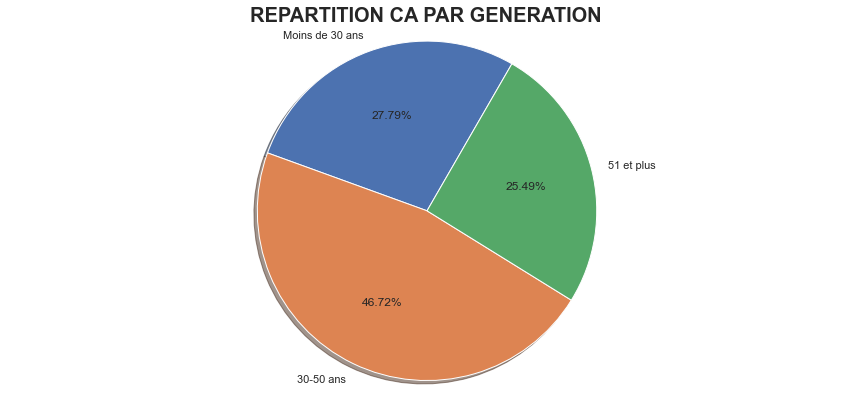

In [730]:
import matplotlib.pyplot as plt

label = "REPARTITION CA PAR GENERATION"
labels = "Moins de 30 ans","30-50 ans","51 et plus"
sizes = [ CA_génération_1["CA"][0], CA_génération_1["CA"][1],CA_génération_1["CA"][2]]
explode = (0, 0,0) 


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=60)
ax1.axis('equal')  # Traitement des ratio pour obtenir un cercle.

plt.title(label , fontdict=None, loc="center", pad=True, y=None,fontweight="bold", size=20)
fig1.set_size_inches(15, 7)

plt.show()

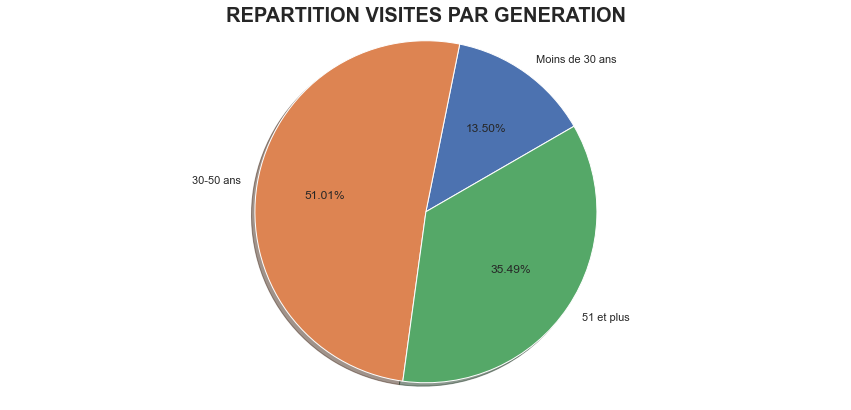

In [731]:
import matplotlib.pyplot as plt

label = "REPARTITION VISITES PAR GENERATION"
labels = "Moins de 30 ans","30-50 ans","51 et plus"
sizes = [ CA_génération_1["Visites"][0], CA_génération_1["Visites"][1],CA_génération_1["Visites"][2]]
explode = (0, 0,0) 


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=30)
ax1.axis('equal')  # Traitement des ratio pour obtenir un cercle.

plt.title(label , fontdict=None, loc="center", pad=True, y=None,fontweight="bold", size=20)
fig1.set_size_inches(15, 7)

plt.show()

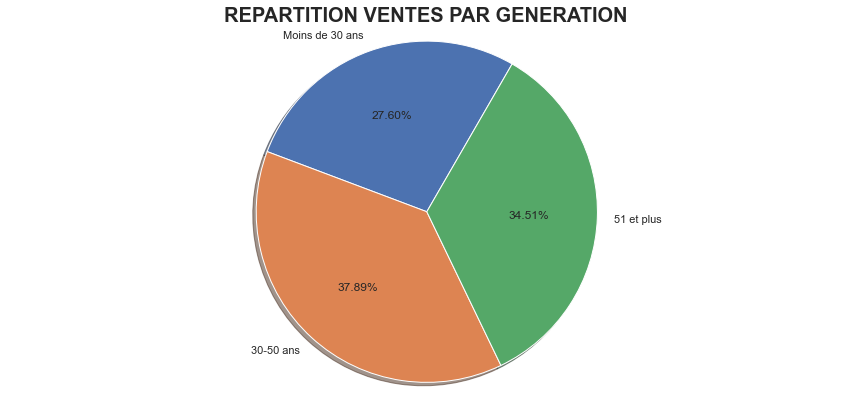

In [732]:
import matplotlib.pyplot as plt

label = "REPARTITION VENTES PAR GENERATION"
labels = "Moins de 30 ans","30-50 ans","51 et plus"
sizes = [ CA_génération_1["Ventes"][0], CA_génération_1["Ventes"][1],CA_génération_1["Ventes"][2]]
explode = (0, 0,0) 


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=60)
ax1.axis('equal')  # Traitement des ratio pour obtenir un cercle.

plt.title(label , fontdict=None, loc="center", pad=True, y=None,fontweight="bold", size=20)
fig1.set_size_inches(15, 7)

plt.show()

### CA_genre

In [733]:
CA_genre = df_final.groupby(["date_longue","sex"]).agg({"price":"sum"})
#CA_genre = CA_genre.sort_values(by=["price"], ascending=False )
CA_genre["price"] = CA_genre["price"].round(2)
CA_genre = CA_genre.reset_index()
CA_genre


,date_longue,sex,price
0,2021-03-01,f,7897.55
1,2021-03-01,m,8678.31
2,2021-03-02,f,8877.50
3,2021-03-02,m,6619.59
4,2021-03-03,f,7610.39
...,...,...,...
1455,2023-02-26,m,9277.63
1456,2023-02-27,f,9881.67
1457,2023-02-27,m,9289.14
1458,2023-02-28,f,8721.06


In [734]:
CA_genre1 = df_final.groupby("sex").agg({"price":"sum"})
CA_genre1 = CA_genre1.sort_values(by=["price"], ascending=False )
CA_genre1["price"] = CA_genre1["price"].round(2)
CA_genre1 = CA_genre1.reset_index()
effectifs = df_final["sex"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["price"]) # création du tableau à partir des modalités
CA_genre1["nombre de reccurence"] = effectifs.values
CA_genre1 = CA_genre1.sort_values(by="price", ascending=False)
CA_genre1.head(3)

,sex,price,nombre de reccurence
0,m,5995151.92,340930
1,f,5860927.80,338402


In [735]:
df_final.groupby(["date_longue","sex"]).agg({"price":"sum"})
#CA_genre = CA_genre.reset_index()
CA_genre1.T

,0,1
sex,m,f
price,5995151.92,5860927.8
nombre de reccurence,340930,338402


### B2B & B2C

In [736]:
df_final["type_client"]=1
labels = ["BtoC","BtoB" ]
df_final.type_client = df_final.type_client.replace(to_replace=1, value="B2C", regex=True)
df_final.loc[(df_final.client_id == "c_1609"),'type_client']='B2B'
df_final.loc[(df_final.client_id == "c_4958"),'type_client']='B2B'
df_final.loc[(df_final.client_id == "c_6714"),'type_client']='B2B'
df_final.loc[(df_final.client_id == "c_3454"),'type_client']='B2B'

In [737]:
df_final["type_client"].unique()

array(['B2C', 'B2B'], dtype=object)

In [738]:
BtoB = ["c_1609", "c_4958", "c_6714", "c_3454"]
BtoB = df_final.loc[df_final["client_id"].isin(BtoB),:]
BtoB = BtoB[['client_id', 'birth', 'sex', 'age', 'id_prod', 'price',
       'categ', 'session_id', 'date_longue', 'date_courte',
       'date_année', 'génération']]


#B2C
clé_filtre = BtoB["client_id"].values.tolist()
BtoC = df_final[~df_final.client_id.isin(clé_filtre)]
BtoC = BtoC[['client_id', 'birth', 'sex', 'age', 'id_prod', 'price',
       'categ', 'session_id', 'date_longue', 'date_courte',
       'date_année', 'génération']]

In [739]:
BtoB.age.unique()

array([54, 42, 23, 53])

## Le Produit

### CA_id_prod

In [740]:
CA_id_prod = df_final.groupby("id_prod").agg({"price":"sum"})
CA_id_prod = CA_id_prod.reset_index()
CA_id_prod["price"] = CA_id_prod["price"].round(2)
CA_id_prod = CA_id_prod.sort_values(by=["price"], ascending=False )
effectifs = df_final["id_prod"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["price"]) # création du tableau à partir des modalités
CA_id_prod["nombre de reccurence"] = effectifs.values
CA_id_prod = CA_id_prod.sort_values(by="price", ascending=False)
CA_id_prod.head(3)

,id_prod,price,nombre de reccurence
3097,2_159,94893.50,2252
3071,2_135,69334.95,2189
3046,2_112,65407.76,2180


### CA_categ

In [741]:
CA_categ = df_final.groupby("categ").agg({"price":"sum"})
CA_categ = CA_categ.reset_index()
CA_categ["price"] = CA_categ["price"].round(2)
effectifs = df_final["categ"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["price"]) # création du tableau à partir des modalités
CA_categ["nombre de reccurence"] = effectifs.values
CA_categ = CA_categ.sort_values(by="price", ascending=False)
CA_id_prod.head(3)
CA_categ.head(3)

,categ,price,nombre de reccurence
1,1,4653722.69,227169
0,0,4422082.01,415680
2,2,2780275.02,36483


## Résidues traitement initial du DF Final

### Client qui n'ont jamais commandé

In [742]:
client_sans_achat = pd.read_csv(r'C:\Users\melle\FORMATION\P6_Mendy\client_sans_achat.csv')
client_sans_achat.head()

,client_id;sex;birth;age
0,c_8253;f;2001;21
1,c_3789;f;1997;25
2,c_4406;f;1998;24
3,ct_0;f;2001;21
4,c_2706;f;1967;55


### id_produit avec 0 vente

In [743]:
id_prod_sans_vente = pd.read_csv(r'C:\Users\melle\FORMATION\P6_Mendy\id_prod_sans_vente.csv')
id_prod_sans_vente.head()

,id_prod;price;categ
0,0_1016;35.06;0.0
1,0_1780;1.67;0.0
2,T_0;-1.0;0.0
3,0_1062;20.08;0.0
4,0_1119;2.99;0.0


## Données temporelle

### CA sur durée

In [744]:
CA_année = df_final.groupby(by=["date_année"]).agg({"price":"sum","session_id":"count"})
CA_année = CA_année.rename(columns={"session_id":"Visites"})
CA_année.head(3) 

,price,Visites
date_année,,
2021,4.771752e+06,278335
2022,6.109958e+06,346500
2023,9.743692e+05,54497


In [745]:
CA_mois = df_final.groupby(by=["date_courte"]).agg({"price":"sum","session_id":"count"})
CA_mois = CA_mois.rename(columns={"session_id":"Visites"})
CA_mois.reset_index(inplace=True)
CA_mois.head(3) 

,date_courte,price,Visites
0,2021 03,482536.353692,28610
1,2021 04,476258.234633,28457
2,2021 05,493028.575504,28293


In [746]:
CA_jour = df_final.groupby(by=["date_longue"]).agg({"price":"sum","session_id":"count"})
CA_jour = CA_jour.rename(columns={"session_id":"Visites"})
CA_jour.head(3) 

,price,Visites
date_longue,,
2021-03-01,16575.858188,963
2021-03-02,15497.088188,940
2021-03-03,15198.690000,911


In [747]:
Année_2021 = df_final.loc[df_final["date_année"]=="2021-01-01"]
Année_2022 = df_final.loc[df_final["date_année"]=="2022-01-01"]
Année_2023 = df_final.loc[df_final["date_année"]=="2023-01-01"]

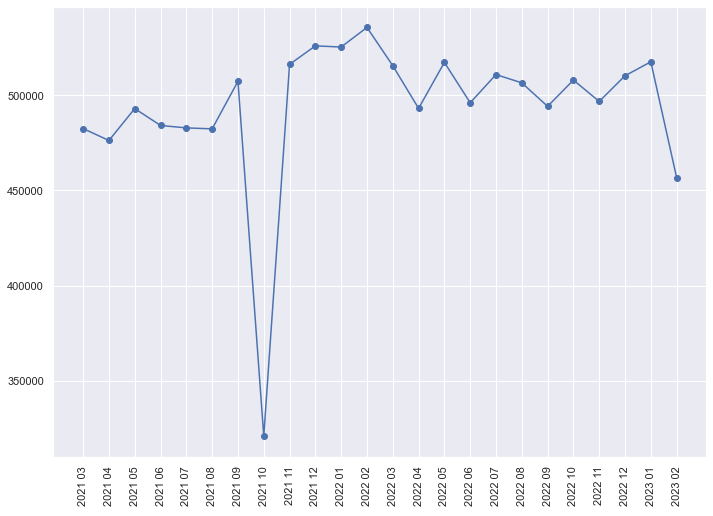

In [748]:
  # VENTE PAR mois
 
  # plot

plt.plot('date_courte', 'price', data=CA_mois, linestyle='-', marker='o')
plt.grid("visible")
plt.xticks(rotation=90) 
   
plt.show()

### frequence_client

In [749]:
frequence_client = df_final.sort_values(by=["client_id","date_longue"])
#frequence_client = frequence_client.set_index("date_longue")
frequence_client.head(3)

,client_id,birth,sex,age,id_prod,price,categ,session_id,date_longue,date_courte,date_année,num_semaine,génération,type_client
181778,c_1,1955,m,67,0_1470,19.53,0,s_47346,2021-06-11,2021 06,2021,23,"(50, 100]",B2C
500006,c_1,1955,m,67,0_513,11.99,0,s_65433,2021-07-21,2021 07,2021,29,"(50, 100]",B2C
300380,c_1,1955,m,67,0_1186,12.30,0,s_66947,2021-07-25,2021 07,2021,29,"(50, 100]",B2C


In [750]:
reference_value = frequence_client["date_longue"][1]
frequence_client['fréquence_d_achat'] = (
        frequence_client['date_longue'] - frequence_client['date_longue'].shift(fill_value=reference_value))

In [751]:
frequence_client["fréquence_d_achat"] = frequence_client["fréquence_d_achat"].dt.days

In [752]:
frequence_client.head(50)

,client_id,birth,sex,age,id_prod,price,categ,session_id,date_longue,date_courte,date_année,num_semaine,génération,type_client,fréquence_d_achat
181778,c_1,1955,m,67,0_1470,19.53,0,s_47346,2021-06-11,2021 06,2021,23,"(50, 100]",B2C,-291
500006,c_1,1955,m,67,0_513,11.99,0,s_65433,2021-07-21,2021 07,2021,29,"(50, 100]",B2C,40
300380,c_1,1955,m,67,0_1186,12.30,0,s_66947,2021-07-25,2021 07,2021,29,"(50, 100]",B2C,4
133578,c_1,1955,m,67,0_1448,18.94,0,s_67467,2021-07-26,2021 07,2021,30,"(50, 100]",B2C,1
160257,c_1,1955,m,67,0_1475,11.99,0,s_67769,2021-07-27,2021 07,2021,30,"(50, 100]",B2C,1
261430,c_1,1955,m,67,0_1378,13.96,0,s_79696,2021-08-23,2021 08,2021,34,"(50, 100]",B2C,27
594034,c_1,1955,m,67,0_2277,10.99,0,s_85977,2021-09-06,2021 09,2021,36,"(50, 100]",B2C,14
374285,c_1,1955,m,67,0_1547,8.99,0,s_86739,2021-09-08,2021 09,2021,36,"(50, 100]",B2C,2
161373,c_1,1955,m,67,0_1429,7.99,0,s_105105,2021-10-15,2021 10,2021,41,"(50, 100]",B2C,37
78415,c_1,1955,m,67,2_208,54.87,2,s_114737,2021-11-04,2021 11,2021,44,"(50, 100]",B2C,20


In [753]:
frequence_client.head(50)

,client_id,birth,sex,age,id_prod,price,categ,session_id,date_longue,date_courte,date_année,num_semaine,génération,type_client,fréquence_d_achat
181778,c_1,1955,m,67,0_1470,19.53,0,s_47346,2021-06-11,2021 06,2021,23,"(50, 100]",B2C,-291
500006,c_1,1955,m,67,0_513,11.99,0,s_65433,2021-07-21,2021 07,2021,29,"(50, 100]",B2C,40
300380,c_1,1955,m,67,0_1186,12.30,0,s_66947,2021-07-25,2021 07,2021,29,"(50, 100]",B2C,4
133578,c_1,1955,m,67,0_1448,18.94,0,s_67467,2021-07-26,2021 07,2021,30,"(50, 100]",B2C,1
160257,c_1,1955,m,67,0_1475,11.99,0,s_67769,2021-07-27,2021 07,2021,30,"(50, 100]",B2C,1
261430,c_1,1955,m,67,0_1378,13.96,0,s_79696,2021-08-23,2021 08,2021,34,"(50, 100]",B2C,27
594034,c_1,1955,m,67,0_2277,10.99,0,s_85977,2021-09-06,2021 09,2021,36,"(50, 100]",B2C,14
374285,c_1,1955,m,67,0_1547,8.99,0,s_86739,2021-09-08,2021 09,2021,36,"(50, 100]",B2C,2
161373,c_1,1955,m,67,0_1429,7.99,0,s_105105,2021-10-15,2021 10,2021,41,"(50, 100]",B2C,37
78415,c_1,1955,m,67,2_208,54.87,2,s_114737,2021-11-04,2021 11,2021,44,"(50, 100]",B2C,20


In [754]:
frequence_client["fréquence_d_achat"] = frequence_client["fréquence_d_achat"].mask(frequence_client["fréquence_d_achat"]<=0,0)

In [755]:
frequence_client.head(3)

,client_id,birth,sex,age,id_prod,price,categ,session_id,date_longue,date_courte,date_année,num_semaine,génération,type_client,fréquence_d_achat
181778,c_1,1955,m,67,0_1470,19.53,0,s_47346,2021-06-11,2021 06,2021,23,"(50, 100]",B2C,0
500006,c_1,1955,m,67,0_513,11.99,0,s_65433,2021-07-21,2021 07,2021,29,"(50, 100]",B2C,40
300380,c_1,1955,m,67,0_1186,12.30,0,s_66947,2021-07-25,2021 07,2021,29,"(50, 100]",B2C,4


### Scoring RFM

In [756]:
#  découpage en 5 classes (très fort, fort, moyen, faible, très faible)
#                         (client très régulier, régulier, cyclique, à fidéliser, ou en perte de vitesse)

In [757]:
date_max_client = df_final.groupby(['client_id']).max()

In [758]:
CA_client = df_final.groupby(['client_id']).sum()

In [759]:
rfm_client = df_final.groupby(['client_id'], as_index = False).agg({'date_longue': 'max', 'session_id': 'count', 'price': 'sum'})
rfm_client.columns = ['client_id', 'r', 'f', 'm']

In [760]:
rfm_client

,client_id,r,f,m
0,c_1,2023-01-15,39,558.18
1,c_10,2023-01-27,58,1353.60
2,c_100,2022-09-20,8,254.85
3,c_1000,2023-01-24,125,2261.89
4,c_1001,2023-02-23,102,1812.86
...,...,...,...,...
8595,c_995,2022-11-21,14,189.41
8596,c_996,2023-02-21,95,1625.58
8597,c_997,2023-02-05,59,1490.01
8598,c_998,2023-02-22,53,2779.88


In [761]:
rfm_client = rfm_client.assign(date_longue='2023-01-01')
rfm_client['date_longue'] = pd.to_datetime(rfm_client['date_longue'],format="%Y/%m/%d")
rfm_client['nb_jour']=rfm_client['date_longue']-rfm_client['r']
rfm_client['r']=rfm_client['nb_jour']

In [762]:
del rfm_client['date_longue']
del rfm_client['nb_jour']

In [763]:
rfm_client

,client_id,r,f,m
0,c_1,-14 days,39,558.18
1,c_10,-26 days,58,1353.60
2,c_100,103 days,8,254.85
3,c_1000,-23 days,125,2261.89
4,c_1001,-53 days,102,1812.86
...,...,...,...,...
8595,c_995,41 days,14,189.41
8596,c_996,-51 days,95,1625.58
8597,c_997,-35 days,59,1490.01
8598,c_998,-52 days,53,2779.88


In [764]:
rfm_client['r']=rfm_client['r'].astype('str')
rfm_client[['r','date_longue']] = rfm_client['r'].str.split(' ',expand=True)

In [765]:
del rfm_client['date_longue']

In [766]:
rfm_client['r']=rfm_client['r'].astype('int')

In [767]:
rfm_client['r'] = rfm_client['r'].fillna(0)
rfm_client['f'] = rfm_client['f'].fillna(0)
rfm_client['m'] = rfm_client['m'].fillna(0)

C:\Users\melle\anaconda3\envs\New_envi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\melle\anaconda3\envs\New_envi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\melle\anaconda3\envs\New_envi\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

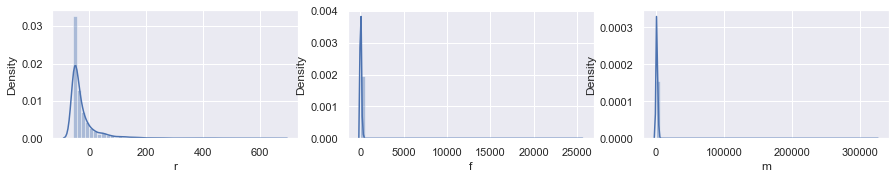

In [768]:
plt.figure(figsize=(15, 8))
plt.subplot(3, 3, 1)
sns.distplot(rfm_client['r'])
plt.subplot(3, 3, 2)
sns.distplot(rfm_client['f'])
plt.subplot(3, 3, 3)
sns.distplot(rfm_client['m'])

plt.show()

In [769]:
# calcule des scores à partir des quartiles:
# On définie les bins [<min, x, x, max]
r_bins = [rfm_client['r'].min()-1,np.quantile(rfm_client['r'],0.25), np.quantile(rfm_client['r'],0.75), rfm_client['r'].max()]
f_bins = [rfm_client['f'].min()-1,np.quantile(rfm_client['f'],0.25), np.quantile(rfm_client['f'],0.75), rfm_client['f'].max()]
m_bins = [rfm_client['m'].min()-1,np.quantile(rfm_client['m'],0.25), np.quantile(rfm_client['m'],0.75), rfm_client['m'].max()]
rfm_client['r_score'] = pd.cut(rfm_client['r'], r_bins, labels = [3, 2, 1])
rfm_client['f_score'] = pd.cut(rfm_client['f'], f_bins, labels = [1, 2, 3])
rfm_client['m_score'] = pd.cut(rfm_client['m'], m_bins, labels = [1, 2, 3])

In [770]:
customers = pd.read_csv(r'C:\Users\melle\FORMATION\P6_Mendy\SOURCE\customers.csv')
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [771]:
rfm_df = rfm_client.merge(customers,on='client_id',how='inner')
rfm_df

,client_id,r,f,m,r_score,f_score,m_score,sex,birth
0,c_1,-14,39,558.18,1,2,2,m,1955
1,c_10,-26,58,1353.60,2,2,2,m,1956
2,c_100,103,8,254.85,1,1,1,m,1992
3,c_1000,-23,125,2261.89,2,3,3,f,1966
4,c_1001,-53,102,1812.86,3,3,3,m,1982
...,...,...,...,...,...,...,...,...,...
8595,c_995,41,14,189.41,1,1,1,m,1955
8596,c_996,-51,95,1625.58,2,2,2,f,1970
8597,c_997,-35,59,1490.01,2,2,2,f,1994
8598,c_998,-52,53,2779.88,3,2,3,m,2001


In [772]:
rfm_merge = rfm_df

In [773]:
rfm_merge['sex_m'] = rfm_merge['sex']=='m'
rfm_merge['sex_f'] = rfm_merge['sex']=='f'

In [774]:
rfm_merge = rfm_merge[['client_id', 'r', 'f', 'm',
                       'r_score', 'f_score', 'm_score', 'sex', 'birth', 
                       'sex_m', 'sex_f']]
rfm_merge

,client_id,r,f,m,r_score,f_score,m_score,sex,birth,sex_m,sex_f
0,c_1,-14,39,558.18,1,2,2,m,1955,True,False
1,c_10,-26,58,1353.60,2,2,2,m,1956,True,False
2,c_100,103,8,254.85,1,1,1,m,1992,True,False
3,c_1000,-23,125,2261.89,2,3,3,f,1966,False,True
4,c_1001,-53,102,1812.86,3,3,3,m,1982,True,False
...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,41,14,189.41,1,1,1,m,1955,True,False
8596,c_996,-51,95,1625.58,2,2,2,f,1970,False,True
8597,c_997,-35,59,1490.01,2,2,2,f,1994,False,True
8598,c_998,-52,53,2779.88,3,2,3,m,2001,True,False


In [775]:
score = ['r_score', 'f_score','m_score']
for var in score:

    rfm_merge[var]= rfm_merge[var].astype('str')

In [776]:
rfm_merge['rfm_group'] = rfm_merge['r_score'].str.cat(rfm_merge['f_score']).str.cat(rfm_merge['m_score'])


In [777]:
rfm_merge

,client_id,r,f,m,r_score,f_score,m_score,sex,birth,sex_m,sex_f,rfm_group
0,c_1,-14,39,558.18,1,2,2,m,1955,True,False,122
1,c_10,-26,58,1353.60,2,2,2,m,1956,True,False,222
2,c_100,103,8,254.85,1,1,1,m,1992,True,False,111
3,c_1000,-23,125,2261.89,2,3,3,f,1966,False,True,233
4,c_1001,-53,102,1812.86,3,3,3,m,1982,True,False,333
...,...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,41,14,189.41,1,1,1,m,1955,True,False,111
8596,c_996,-51,95,1625.58,2,2,2,f,1970,False,True,222
8597,c_997,-35,59,1490.01,2,2,2,f,1994,False,True,222
8598,c_998,-52,53,2779.88,3,2,3,m,2001,True,False,323


In [778]:
currDate= datetime.now()
print(currDate)

2022-02-07 13:36:18.220228


In [779]:
# Création colonne age
rfm_merge['age'] = (currDate.year - rfm_merge['birth'])

In [780]:
# nombre de client pour chauqe groupe
rfm_group = rfm_merge.groupby(['rfm_group']).agg({'client_id':'count','m':'sum','sex_f':'sum','sex_m':'sum','age':'mean'})


In [781]:
rfm_merge['r_score']=rfm_merge['r_score'].astype('str')
rfm_merge['f_score']=rfm_merge['f_score'].astype('str')
rfm_merge['m_score']=rfm_merge['m_score'].astype('str')

In [782]:
rfm_merge['rfm_group'] = rfm_merge['r_score'].str.cat(rfm_merge['f_score']).str.cat(rfm_merge['m_score'])


In [783]:
rfm_group = rfm_merge.groupby(['rfm_group']).agg({'client_id':'count','m':'sum','sex_f':'sum','sex_m':'sum','age':'mean'})

In [784]:
rfm_group

,client_id,m,sex_f,sex_m,age
rfm_group,,,,,
111,958,2.409030e+05,509,449,45.144050
112,295,2.632667e+05,143,152,23.996610
113,3,5.772540e+03,2,1,24.333333
121,200,8.988523e+04,94,106,47.460000
122,569,5.288499e+05,283,286,41.061511
123,63,1.417051e+05,34,29,24.523810
132,26,3.828571e+04,16,10,41.153846
133,13,2.724999e+04,8,5,38.461538
211,483,1.460400e+05,257,226,49.958592


In [785]:
rfm_liste = rfm_merge.groupby(['rfm_group']).agg({'client_id':'sum','m':'sum','sex_f':'sum','sex_m':'sum','age':'mean'})

In [786]:
# Liste des clients par groupe
rfm_liste = rfm_liste["client_id"]
rfm_liste

rfm_group
111    c_100c_1008c_1009c_1024c_1029c_1035c_1044c_105...
112    c_1021c_1048c_1065c_1088c_1131c_1147c_1185c_11...
113                                   c_1186c_1194c_4927
121    c_1036c_1076c_1129c_1160c_1162c_1251c_1288c_13...
122    c_1c_1037c_1043c_1049c_1058c_1061c_1066c_1070c...
123    c_1018c_1096c_1283c_1305c_1354c_1454c_1768c_17...
132    c_1384c_1790c_2388c_2616c_2767c_2826c_3333c_42...
133    c_169c_368c_4417c_4513c_4737c_5497c_5590c_6258...
211    c_101c_1012c_102c_1034c_104c_1042c_1089c_1090c...
212    c_1033c_1056c_111c_1158c_1159c_1176c_1181c_120...
213    c_1400c_1566c_2329c_3089c_3185c_4791c_6032c_66...
221    c_1002c_1092c_1146c_1164c_1235c_1268c_1293c_13...
222    c_10c_1005c_1010c_1020c_1026c_1040c_1041c_1046...
223    c_1011c_1022c_1023c_1052c_1064c_1100c_1149c_11...
232    c_1003c_1015c_1027c_1072c_1098c_1102c_1120c_11...
233    c_1000c_1006c_1016c_1017c_1025c_1067c_1077c_11...
311    c_1007c_1019c_1073c_1174c_1316c_1344c_151c_156...
312    c_1188c_1204c_

In [787]:
rfm_liste = pd.DataFrame(rfm_liste)
rfm_liste

,client_id
rfm_group,
111,c_100c_1008c_1009c_1024c_1029c_1035c_1044c_105...
112,c_1021c_1048c_1065c_1088c_1131c_1147c_1185c_11...
113,c_1186c_1194c_4927
121,c_1036c_1076c_1129c_1160c_1162c_1251c_1288c_13...
122,c_1c_1037c_1043c_1049c_1058c_1061c_1066c_1070c...
123,c_1018c_1096c_1283c_1305c_1354c_1454c_1768c_17...
132,c_1384c_1790c_2388c_2616c_2767c_2826c_3333c_42...
133,c_169c_368c_4417c_4513c_4737c_5497c_5590c_6258...
211,c_101c_1012c_102c_1034c_104c_1042c_1089c_1090c...


In [788]:
rfm_liste = rfm_liste.merge(rfm_group, on="rfm_group")

In [789]:
df_final.head()

,client_id,birth,sex,age,id_prod,price,categ,session_id,date_longue,date_courte,date_année,num_semaine,génération,type_client
0,c_4410,1967,f,55,0_1316,7.2,0,s_141762,2021-12-29,2021 12,2021,52,"(50, 100]",B2C
1,c_4410,1967,f,55,0_1316,7.2,0,s_186233,2022-03-29,2022 03,2022,13,"(50, 100]",B2C
2,c_4410,1967,f,55,0_1316,7.2,0,s_215758,2022-05-29,2022 05,2022,21,"(50, 100]",B2C
3,c_3654,1978,f,44,0_1316,7.2,0,s_125143,2021-11-26,2021 11,2021,47,"(30, 50]",B2C
4,c_3654,1978,f,44,0_1316,7.2,0,s_258546,2022-08-26,2022 08,2022,34,"(30, 50]",B2C


In [790]:
rfm_liste = rfm_liste.rename(columns={"client_id_y":"Nombre_de_Client"})
rfm_liste= rfm_liste.rename(columns={"client_id_x":"Liste_client_par_groupe"})
rfm_liste= rfm_liste.rename(columns={"m":"CA"})
rfm_liste= rfm_liste.rename(columns={"sex_f":"Femmes"})
rfm_liste= rfm_liste.rename(columns={"sex_m":"Hommes"})
rfm_liste

,Liste_client_par_groupe,Nombre_de_Client,CA,Femmes,Hommes,age
rfm_group,,,,,,
111,c_100c_1008c_1009c_1024c_1029c_1035c_1044c_105...,958,2.409030e+05,509,449,45.144050
112,c_1021c_1048c_1065c_1088c_1131c_1147c_1185c_11...,295,2.632667e+05,143,152,23.996610
113,c_1186c_1194c_4927,3,5.772540e+03,2,1,24.333333
121,c_1036c_1076c_1129c_1160c_1162c_1251c_1288c_13...,200,8.988523e+04,94,106,47.460000
122,c_1c_1037c_1043c_1049c_1058c_1061c_1066c_1070c...,569,5.288499e+05,283,286,41.061511
123,c_1018c_1096c_1283c_1305c_1354c_1454c_1768c_17...,63,1.417051e+05,34,29,24.523810
132,c_1384c_1790c_2388c_2616c_2767c_2826c_3333c_42...,26,3.828571e+04,16,10,41.153846
133,c_169c_368c_4417c_4513c_4737c_5497c_5590c_6258...,13,2.724999e+04,8,5,38.461538
211,c_101c_1012c_102c_1034c_104c_1042c_1089c_1090c...,483,1.460400e+05,257,226,49.958592


In [791]:
Liste_client = Liste_client = rfm_liste["Liste_client_par_groupe"].str.split('c')

In [792]:
### Enregistrement du Liste_client_par groupe RFM sous format CSV
Liste_client.to_csv(r'C:\Users\melle\FORMATION\P6_Mendy\Liste_client.csv')

In [793]:
rfm_liste.columns

Index(['Liste_client_par_groupe', 'Nombre_de_Client', 'CA', 'Femmes', 'Hommes',
       'age'],
      dtype='object')

In [794]:
rfm_group['client_percent']=(rfm_group['client_id']*100)/rfm_group['client_id'].sum()
rfm_group['CA_percent']=(rfm_group['m']*100)/rfm_group['m'].sum()
rfm_group['ratio_CA_client'] = rfm_group['CA_percent']/rfm_group['client_percent']
rfm_group['sex_f_percent'] = (rfm_group['sex_f']*100)/rfm_group['client_id'].sum()
rfm_group['sex_m_percent'] = (rfm_group['sex_m']*100)/rfm_group['client_id'].sum()

In [795]:
rfm_group = rfm_group.sort_values(by='ratio_CA_client', ascending=False)
rfm_group

,client_id,m,sex_f,sex_m,age,client_percent,CA_percent,ratio_CA_client,sex_f_percent,sex_m_percent
rfm_group,,,,,,,,,,
333,860,3.249700e+06,443,417,45.879070,10.000000,27.409565,2.740956,5.151163,4.848837
323,184,4.920190e+05,98,86,24.375000,2.139535,4.149930,1.939641,1.139535,1.000000
233,677,1.751821e+06,353,324,45.447563,7.872093,14.775717,1.876974,4.104651,3.767442
223,341,8.699000e+05,180,161,24.049853,3.965116,7.337164,1.850428,2.093023,1.872093
123,63,1.417051e+05,34,29,24.523810,0.732558,1.195211,1.631557,0.395349,0.337209
133,13,2.724999e+04,8,5,38.461538,0.151163,0.229840,1.520479,0.093023,0.058140
213,9,1.780373e+04,5,4,21.555556,0.104651,0.150165,1.434914,0.058140,0.046512
113,3,5.772540e+03,2,1,24.333333,0.034884,0.048688,1.395735,0.023256,0.011628
332,233,3.581289e+05,123,110,45.201717,2.709302,3.020635,1.114913,1.430233,1.279070


In [796]:
# Correction nan
frm_3nan3  = rfm_merge[rfm_merge['rfm_group']=='3nan3']
frm_3nan3 

,client_id,r,f,m,r_score,f_score,m_score,sex,birth,sex_m,sex_f,rfm_group,age


In [797]:
rfm_df

,client_id,r,f,m,r_score,f_score,m_score,sex,birth,sex_m,sex_f
0,c_1,-14,39,558.18,1,2,2,m,1955,True,False
1,c_10,-26,58,1353.60,2,2,2,m,1956,True,False
2,c_100,103,8,254.85,1,1,1,m,1992,True,False
3,c_1000,-23,125,2261.89,2,3,3,f,1966,False,True
4,c_1001,-53,102,1812.86,3,3,3,m,1982,True,False
...,...,...,...,...,...,...,...,...,...,...,...
8595,c_995,41,14,189.41,1,1,1,m,1955,True,False
8596,c_996,-51,95,1625.58,2,2,2,f,1970,False,True
8597,c_997,-35,59,1490.01,2,2,2,f,1994,False,True
8598,c_998,-52,53,2779.88,3,2,3,m,2001,True,False


In [798]:
# frm_nan = Outliers = supprimer du df
rfm_merge = rfm_merge[rfm_merge.index!='3nan3']
#rfm_df = rfm_df[rfm_df['rfm_group']!='3nan3']

In [799]:
rfm_group = rfm_group.round(2)
rfm_group

,client_id,m,sex_f,sex_m,age,client_percent,CA_percent,ratio_CA_client,sex_f_percent,sex_m_percent
rfm_group,,,,,,,,,,
333,860,3249699.83,443,417,45.88,10.00,27.41,2.74,5.15,4.85
323,184,492019.04,98,86,24.38,2.14,4.15,1.94,1.14,1.00
233,677,1751820.82,353,324,45.45,7.87,14.78,1.88,4.10,3.77
223,341,869900.02,180,161,24.05,3.97,7.34,1.85,2.09,1.87
123,63,141705.12,34,29,24.52,0.73,1.20,1.63,0.40,0.34
133,13,27249.99,8,5,38.46,0.15,0.23,1.52,0.09,0.06
213,9,17803.73,5,4,21.56,0.10,0.15,1.43,0.06,0.05
113,3,5772.54,2,1,24.33,0.03,0.05,1.40,0.02,0.01
332,233,358128.94,123,110,45.20,2.71,3.02,1.11,1.43,1.28


In [800]:
rfm_group["Profil_client"]=1
bins = [0,0.5,1,1.5,2,10]
labels = ["Clients perdu","clients_peu_rentable","clients_a_relancer","clients_a_fidéliser","Gold_client" ]
rfm_group["Profil_client"]=pd.cut(rfm_group["ratio_CA_client"], bins, labels)

In [801]:
### Enregistrement du rfm_group sous format CSV
rfm_group.to_csv(r'C:\Users\melle\FORMATION\P6_Mendy\rfm_group.csv')

In [802]:
rfm_group

,client_id,m,sex_f,sex_m,age,client_percent,CA_percent,ratio_CA_client,sex_f_percent,sex_m_percent,Profil_client
rfm_group,,,,,,,,,,,
333,860,3249699.83,443,417,45.88,10.00,27.41,2.74,5.15,4.85,"(2.0, 10.0]"
323,184,492019.04,98,86,24.38,2.14,4.15,1.94,1.14,1.00,"(1.5, 2.0]"
233,677,1751820.82,353,324,45.45,7.87,14.78,1.88,4.10,3.77,"(1.5, 2.0]"
223,341,869900.02,180,161,24.05,3.97,7.34,1.85,2.09,1.87,"(1.5, 2.0]"
123,63,141705.12,34,29,24.52,0.73,1.20,1.63,0.40,0.34,"(1.5, 2.0]"
133,13,27249.99,8,5,38.46,0.15,0.23,1.52,0.09,0.06,"(1.5, 2.0]"
213,9,17803.73,5,4,21.56,0.10,0.15,1.43,0.06,0.05,"(1.0, 1.5]"
113,3,5772.54,2,1,24.33,0.03,0.05,1.40,0.02,0.01,"(1.0, 1.5]"
332,233,358128.94,123,110,45.20,2.71,3.02,1.11,1.43,1.28,"(1.0, 1.5]"


In [803]:
rfm_group.index

Index(['333', '323', '233', '223', '123', '133', '213', '113', '332', '232',
       '132', '322', '222', '312', '212', '122', '112', '321', '221', '121',
       '311', '211', '111'],
      dtype='object', name='rfm_group')

''

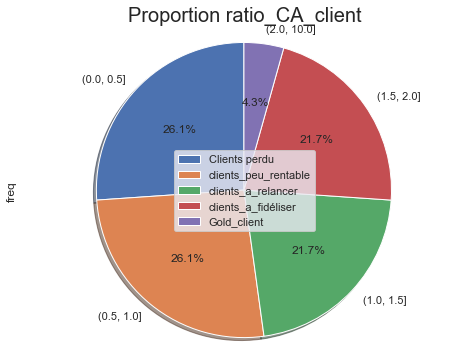

In [804]:
labels = "Clients perdu","clients_peu_rentable","clients_a_relancer","clients_a_fidéliser","Gold_client" 

t = pd.crosstab(rfm_group.Profil_client, "freq")
t.plot.pie(subplots=True, figsize = (8, 6),autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Proportion ratio_CA_client",size=20)
plt.axis('equal')
labels = "Clients perdu","clients_peu_rentable","clients_a_relancer","clients_a_fidéliser","Gold_client" 

plt.legend(labels, loc="center")
;


In [805]:
# groupe Tres bon clients
rfm_group[rfm_group['ratio_CA_client']>2]

,client_id,m,sex_f,sex_m,age,client_percent,CA_percent,ratio_CA_client,sex_f_percent,sex_m_percent,Profil_client
rfm_group,,,,,,,,,,,
333,860,3249699.83,443,417,45.88,10.0,27.41,2.74,5.15,4.85,"(2.0, 10.0]"


In [806]:
rfm_group[rfm_group['ratio_CA_client']>1]

,client_id,m,sex_f,sex_m,age,client_percent,CA_percent,ratio_CA_client,sex_f_percent,sex_m_percent,Profil_client
rfm_group,,,,,,,,,,,
333,860,3249699.83,443,417,45.88,10.00,27.41,2.74,5.15,4.85,"(2.0, 10.0]"
323,184,492019.04,98,86,24.38,2.14,4.15,1.94,1.14,1.00,"(1.5, 2.0]"
233,677,1751820.82,353,324,45.45,7.87,14.78,1.88,4.10,3.77,"(1.5, 2.0]"
223,341,869900.02,180,161,24.05,3.97,7.34,1.85,2.09,1.87,"(1.5, 2.0]"
123,63,141705.12,34,29,24.52,0.73,1.20,1.63,0.40,0.34,"(1.5, 2.0]"
133,13,27249.99,8,5,38.46,0.15,0.23,1.52,0.09,0.06,"(1.5, 2.0]"
213,9,17803.73,5,4,21.56,0.10,0.15,1.43,0.06,0.05,"(1.0, 1.5]"
113,3,5772.54,2,1,24.33,0.03,0.05,1.40,0.02,0.01,"(1.0, 1.5]"
332,233,358128.94,123,110,45.20,2.71,3.02,1.11,1.43,1.28,"(1.0, 1.5]"


In [807]:
# Voici la liste de groupe ayant un ratio '% du CA / % clients' <1 :
group_flop = rfm_group[rfm_group['ratio_CA_client']<1]
group_flop

,client_id,m,sex_f,sex_m,age,client_percent,CA_percent,ratio_CA_client,sex_f_percent,sex_m_percent,Profil_client
rfm_group,,,,,,,,,,,
322,806,859093.36,427,379,49.67,9.37,7.25,0.77,4.97,4.41,"(0.5, 1.0]"
222,1754,1789744.17,941,813,47.66,20.40,15.10,0.74,10.94,9.45,"(0.5, 1.0]"
312,64,62220.19,34,30,25.09,0.74,0.52,0.71,0.40,0.35,"(0.5, 1.0]"
212,228,216274.87,117,111,25.82,2.65,1.82,0.69,1.36,1.29,"(0.5, 1.0]"
122,569,528849.86,283,286,41.06,6.62,4.46,0.67,3.29,3.33,"(0.5, 1.0]"
112,295,263266.69,143,152,24.00,3.43,2.22,0.65,1.66,1.77,"(0.5, 1.0]"
321,89,41669.36,41,48,50.46,1.03,0.35,0.34,0.48,0.56,"(0.0, 0.5]"
221,270,124500.20,141,129,52.00,3.14,1.05,0.33,1.64,1.50,"(0.0, 0.5]"
121,200,89885.23,94,106,47.46,2.33,0.76,0.33,1.09,1.23,"(0.0, 0.5]"


In [808]:
group_flop.index.unique()

Index(['322', '222', '312', '212', '122', '112', '321', '221', '121', '311',
       '211', '111'],
      dtype='object', name='rfm_group')

In [809]:
# Voici la liste de clients à relancer (r = 1) :
client_relance = rfm_df[rfm_df['r_score']==1]
client_relance

,client_id,r,f,m,r_score,f_score,m_score,sex,birth,sex_m,sex_f
0,c_1,-14,39,558.18,1,2,2,m,1955,True,False
2,c_100,103,8,254.85,1,1,1,m,1992,True,False
11,c_1008,48,6,91.94,1,1,1,m,1966,True,False
12,c_1009,71,20,513.82,1,1,1,f,1994,False,True
22,c_1018,1,30,1885.01,1,2,3,f,1993,False,True
...,...,...,...,...,...,...,...,...,...,...,...
8565,c_968,-15,34,473.99,1,2,1,m,1979,True,False
8570,c_972,101,20,1099.48,1,1,2,m,2004,True,False
8573,c_975,-4,19,761.15,1,1,2,m,1994,True,False
8586,c_987,-6,16,306.40,1,1,1,m,1954,True,False


### session_202X

In [810]:
frequence = frequence_client.groupby(["age","génération","fréquence_d_achat"]).agg({"price":"sum"})
frequence.reset_index(inplace=True)
frequence

,age,génération,fréquence_d_achat,price
0,18,"(0, 30]",0,243397.65
1,18,"(0, 30]",1,15301.87
2,18,"(0, 30]",2,10574.06
3,18,"(0, 30]",3,11709.85
4,18,"(0, 30]",4,12432.22
...,...,...,...,...
88003,93,"(50, 100]",548,0.00
88004,93,"(50, 100]",549,0.00
88005,93,"(50, 100]",557,0.00
88006,93,"(50, 100]",564,0.00


In [811]:
frequence_age = frequence_client.groupby(["age"]).agg({"price":"sum","fréquence_d_achat":"mean"})
frequence_age.reset_index(inplace=True)
frequence_age

,age,price,fréquence_d_achat
0,18,609013.690000,18.030695
1,19,178195.780000,20.558453
2,20,184209.264564,19.451929
3,21,178497.700000,18.650517
4,22,165029.256376,18.573726
...,...,...,...
71,89,5264.988188,13.321101
72,90,5043.190000,13.045016
73,91,2815.450000,16.170588
74,92,4013.870000,11.389381


In [812]:
session_2021 = df_final.loc[df_final["date_année"]=="2021"].groupby("date_courte").agg({"session_id":"count"})
session_2022 = df_final.loc[df_final["date_année"]=="2022"].groupby("date_courte").agg({"session_id":"count"})
session_2023 = df_final.loc[df_final["date_année"]=="2023"].groupby("date_courte").agg({"session_id":"count"})

# Analyse descriptive

## Courbe de Lorenz

0.3954386182566423


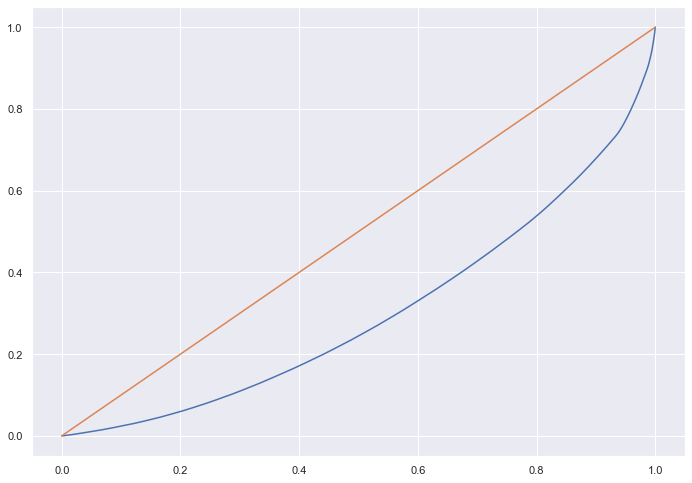

In [813]:
# ensure your arr is sorted from lowest to highest values first!
arr = np.array(df_final["price"].sort_values())

def gini(arr):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

def lorenz(arr):
    # this divides the prefix sum by the total sum
    # this ensures all the values are between 0 and 1.0
    scaled_prefix_sum = arr.cumsum() / arr.sum()
    # this prepends the 0 value (because 0% of all people have 0% of all wealth)
    return np.insert(scaled_prefix_sum, 0, 0)

# show the gini index!
print(gini(arr))

lorenz_curve = lorenz(arr)
# we need the X values to be between 0.0 to 1.0
plt.plot(np.linspace(0.0, 1.0, lorenz_curve.size), lorenz_curve)
# plot the straight line perfect equality curve
plt.plot([0,1], [0,1])
plt.show()

In [814]:
arr_max = df_final["price"].sort_values().describe()
arr_max

count    679332.000000
mean         17.452556
std          18.326428
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [815]:
# Q4=15 à max 18.88 à 300
Q4 = arr_max[6]
Q4

18.99

In [816]:
df_final[df_final['type_client'].isin(['B2B'])].client_id.unique()

array(['c_6714', 'c_1609', 'c_4958', 'c_3454'], dtype=object)

In [817]:
df_final.query("price>18.99")

,client_id,birth,sex,age,id_prod,price,categ,session_id,date_longue,date_courte,date_année,num_semaine,génération,type_client
298,c_4410,1967,f,55,1_385,25.99,1,s_9707,2021-03-22,2021 03,2021,12,"(50, 100]",B2C
299,c_4410,1967,f,55,1_385,25.99,1,s_345108,2023-02-22,2023 02,2023,8,"(50, 100]",B2C
300,c_8203,1959,f,63,1_385,25.99,1,s_226731,2022-06-20,2022 06,2022,25,"(50, 100]",B2C
301,c_8203,1959,f,63,1_385,25.99,1,s_51448,2021-06-20,2021 06,2021,24,"(50, 100]",B2C
302,c_3692,1963,f,59,1_385,25.99,1,s_69053,2021-07-30,2021 07,2021,30,"(50, 100]",B2C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679321,c_7135,1996,m,26,2_99,84.99,2,s_61009,2021-07-11,2021 07,2021,27,"(0, 30]",B2C
679322,c_5828,1998,f,24,2_99,84.99,2,s_211661,2022-05-21,2022 05,2022,20,"(0, 30]",B2C
679323,c_5828,1998,f,24,2_99,84.99,2,s_122697,2021-11-21,2021 11,2021,46,"(0, 30]",B2C
679324,c_5828,1998,f,24,2_99,84.99,2,s_241374,2022-07-21,2022 07,2022,29,"(0, 30]",B2C


0.3954386182566423


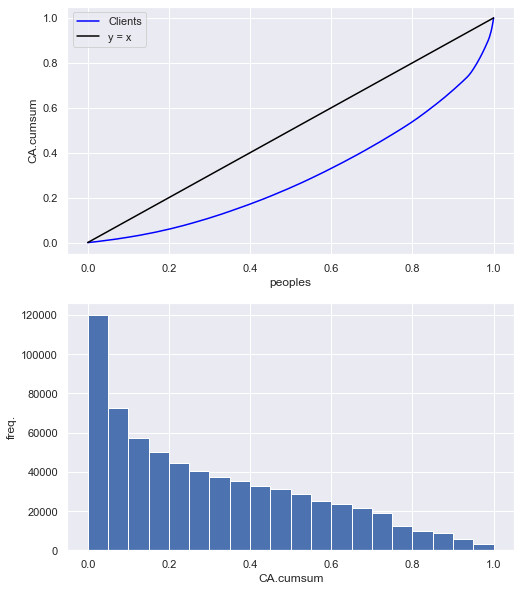

In [818]:
#Capture de données
#'M'Obtenez des données pour
df0 = df_final
#'G1'Ordonné par ordre croissant
df = df0.sort_values(by=['price'])
#'Ct'Ajoutez une colonne numérique appelée
df['Ct']=np.arange(1,len(df)+1)

#Remplacez x par une chaîne numérique
x = df['Ct']
#Remplacer la valeur cumulée des données G1 par y
y = df['price'].cumsum()
#Dessin graphique
fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(8,2*5))
#x,Normaliser avec la valeur maximale de y et dessiner avec une ligne bleue
ax1.plot(x/max(x),y/max(y),'blue', label='Clients')
#En tant que distribution uniforme, y=Dessin graphique de x
ax1.plot(x/max(x),x/max(x),'black', label = 'y = x')
#Dessinez la distribution de fréquence sur ax2 (Puisque la note est de 20 niveaux,=20）
ax2.hist(y/max(y), bins = 20, range =(0,1),label ='M')
ax1.set_xlabel('peoples')
ax1.set_ylabel('CA.cumsum')
ax2.set_ylabel('freq.')
ax2.set_xlabel('CA.cumsum')
ax1.legend()
ax1.grid(True)
 

def gini(df):
    count = arr.size
    coefficient = 2 / count
    indexes = np.arange(1, count + 1)
    weighted_sum = (indexes * arr).sum()
    total = arr.sum()
    constant = (count + 1) / count
    return coefficient * weighted_sum / total - constant

# show the gini index!
print(gini(df))

plt.show()

In [819]:
# Q4=15 à max 18.88 à 300
arr_max[6]

18.99

## Le CA

Données concernant les ventes totales

Le CA total s'élève à 11856079.72 €.
Le CA de l'année 2021 s'élève à : 4771752.082360546€
Le CA de l'annee 2021 est basé sur 10 mois

Le CA de l'année 2022 s'élève à : 6109958.39256627€
Soit une difference de 28.04%
Le CA de l'annee 2022 est basé sur 12 mois

Le CA de l'année 2023 s'élève à : 974369.2446327315€
Soit une difference de -84.05%
Le CA de l'annee 2023 est basé sur 2 mois


Nombre totale de transactions: 1443
Le prix moyen est de 17.45€  avec un prix minimum de 0.62€ , et un prix maximum à 300.0 €

Autres données concernant le prix
Moyenne : 17.452555921934408
Mediane : 13.99
Mode : 0    15.99
dtype: float64
Var : 335.8574746701571
Ect: 18.326414670364663
skewness: 5.391218253698812
kurtosis: 43.08218542224833


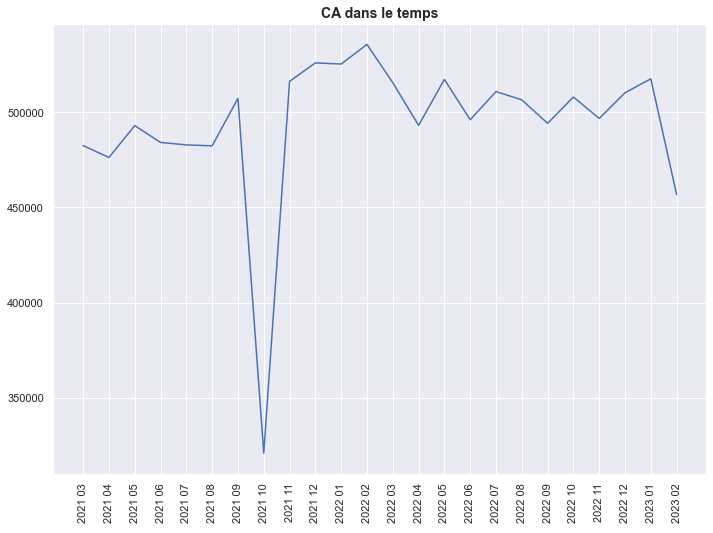

In [820]:
plt.figure()
x= CA_mois['date_courte']
y1 = CA_mois['price']
y2 = CA_mois['Visites']
plt.title('CA dans le temps',
                fontsize = 14, fontweight ='bold')
plt.xticks(rotation=90)
plt.grid("visible")
plt.plot(x,y1);


print("Données concernant les ventes totales")
print("")
print("Le CA total s'élève à " "{:.10}".format(df_final["price"].sum()),"€.")
print("Le CA de l'année 2021 s'élève à : {}€".format(CA_année["price"][0]))
print("Le CA de l'annee 2021 est basé sur {} mois".format(len(df_final.loc[df_final["date_année"]=="2021"].groupby("date_courte").agg({"price":"sum"}))))
print("")
print("Le CA de l'année 2022 s'élève à : {}€".format(CA_année["price"][1]))
print("Soit une difference de {:.2%}".format((CA_année["price"][1]-CA_année["price"][0])/(CA_année["price"][0])))
print("Le CA de l'annee 2022 est basé sur {} mois".format(len(df_final.loc[df_final["date_année"]=="2022"].groupby("date_courte").agg({"price":"sum"}))))
print("")
print("Le CA de l'année 2023 s'élève à : {}€".format(CA_année["price"][2]))
print("Soit une difference de {:.2%}".format((CA_année["price"][2]-CA_année["price"][1])/(CA_année["price"][1])))
print("Le CA de l'annee 2023 est basé sur {} mois".format(len(df_final.loc[df_final["date_année"]=="2023"].groupby("date_courte").agg({"price":"sum"}))))

print("")
print("")
print("Nombre totale de transactions: " + str(df_final["price"].value_counts().value_counts().sum()))
print("Le prix moyen est de {:.4}€".format(df_final["price"].mean()), " avec un prix minimum de {:.4}€".format(df_final["price"].min()),", et un prix maximum à {}".format(df_final["price"].max()),"€")
print("")
print("Autres données concernant le prix")
print("Moyenne : {:4}".format(df_final.price.mean()))
print("Mediane : {}".format(df_final.price.median()))
print("Mode : {}".format(df_final.price.mode()))

print("Var : {}".format(df_final.price.var(ddof=0)))
print("Ect: {}".format(df_final.price.std(ddof=0)))
print("skewness: {}".format(df_final.price.skew()))
print("kurtosis: {}".format(df_final.price.kurtosis()))

## Le mois d'octobre

In [821]:
temps = [ 'date_longue' ,'date_courte', 'date_année']
for var in temps:
    df_final[var] = df_final[var].astype("datetime64[ns]")

In [822]:
Mois_octobre = df_final.loc[df_final["date_courte"]=="10/2021"]
Mois_octobre = Mois_octobre.groupby(by=["num_semaine","categ"]).agg({"price":"sum"})
Mois_octobre.reset_index(inplace=True)
Mois_octobre.price = Mois_octobre.price.round(2)
Mois_octobre = Mois_octobre.rename(columns={"price":"CA"})
Mois_octobre

,num_semaine,categ,CA
0,39,0,20878.08
1,39,1,7003.79
2,39,2,7351.65
3,40,0,47232.58
4,40,2,17598.97
5,41,0,46993.62
6,41,2,20301.56
7,42,0,42328.44
8,42,2,21283.57
9,43,0,41892.58


In [823]:
Octobre = df_final.loc[df_final["date_courte"]=="2021 10"].groupby(by=["num_semaine","categ"]).agg({"price":"sum"})
Octobre.reset_index(inplace=True)
Octobre = Octobre.rename(columns={"price":"CA"})
Octobre.CA = Octobre.CA.round(2)
Octobre

,num_semaine,categ,CA
0,39,0,20878.08
1,39,1,7003.79
2,39,2,7351.65
3,40,0,47232.58
4,40,2,17598.97
5,41,0,46993.62
6,41,2,20301.56
7,42,0,42328.44
8,42,2,21283.57
9,43,0,41892.58


In [824]:
Octobre = Octobre.pivot(index = 'num_semaine', columns = 'categ', values = 'CA')
Octobre = Octobre.fillna(0)
Octobre

categ,0,1,2
num_semaine,,,
39,20878.08,7003.79,7351.65
40,47232.58,0.00,17598.97
41,46993.62,0.00,20301.56
42,42328.44,0.00,21283.57
43,41892.58,26758.53,21249.84


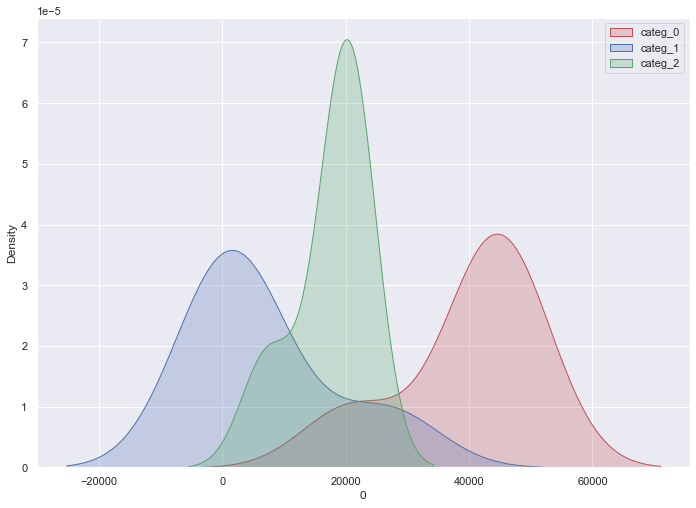

In [825]:
fig = sns.kdeplot(Octobre[0], shade=True, color="r", label="categ_0")
fig = sns.kdeplot(Octobre[1], shade=True, color="b", label="categ_1")
fig = sns.kdeplot(Octobre[2], shade=True, color="g", label="categ_2")
fig.legend()
plt.show()

Text(0.5, 1.0, "CA du mois d'octobre par Semaine et catégorie")

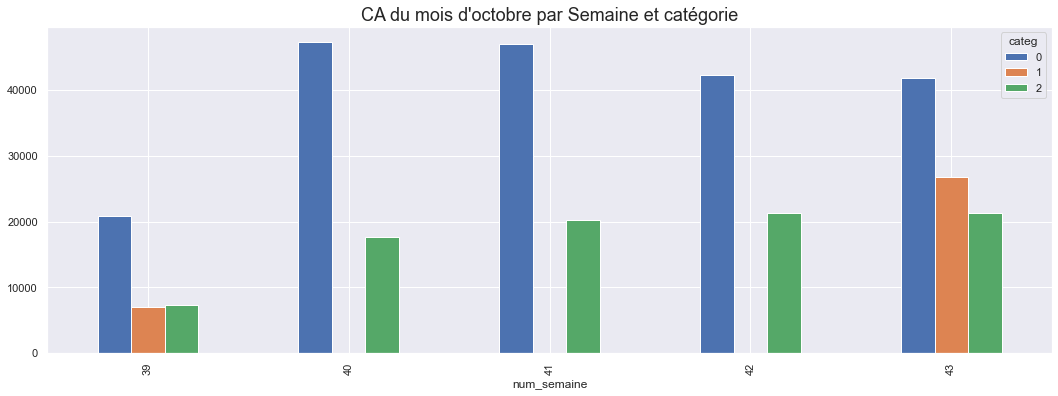

In [826]:
ax = Octobre.plot(kind = "bar", figsize=(18,6))
plt.title("CA du mois d'octobre par Semaine et catégorie", size=18)

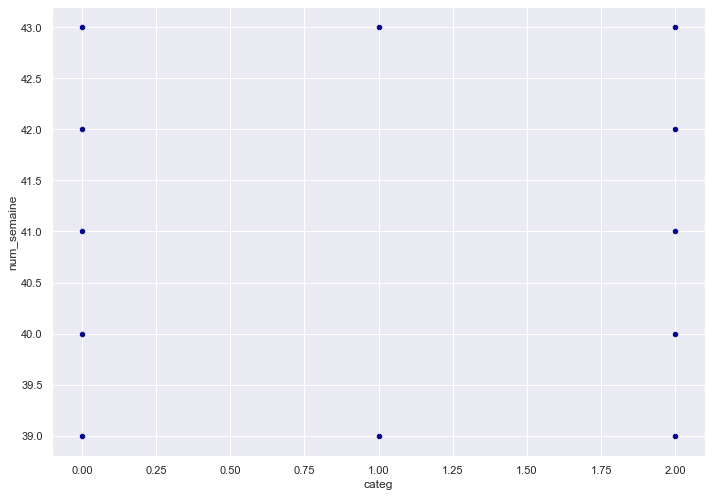

In [827]:
a1 = Mois_octobre.plot.scatter(x='categ',
                            y='num_semaine',
                            c='DarkBlue')

In [828]:
print("La baisse de revenue du mois d'octobre est due à l'absence de données de la catégorie 1 sur une durée de 3 semaines ")

La baisse de revenue du mois d'octobre est due à l'absence de données de la catégorie 1 sur une durée de 3 semaines 


### Le Prix

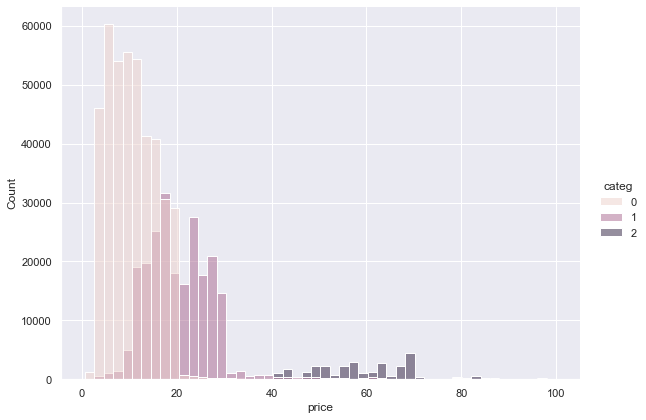

In [829]:
data = df_final[df_final.price.abs() < 100]
sns.displot(data=data, x='price', kind='hist',
            height=6, aspect=1.4, bins=50,
            hue='categ');

In [830]:
CA_mois = CA_mois.reset_index()
CA_mois

,index,date_courte,price,Visites
0,0,2021 03,482536.353692,28610
1,1,2021 04,476258.234633,28457
2,2,2021 05,493028.575504,28293
3,3,2021 06,484163.027316,26857
4,4,2021 07,482877.952752,24742
5,5,2021 08,482380.533692,25659
6,6,2021 09,507368.338257,33326
7,7,2021 10,320873.207316,21606
8,8,2021 11,516274.111881,28321
9,9,2021 12,525991.747316,32464


In [831]:
#Pourcentage d'évolution de Sept à Octobre 
VA = CA_mois.iloc[7]["price"]
VD = CA_mois.iloc[6]["price"]
octobre_evo = (VA - VD) / VD *100
octobre_evo = octobre_evo.round(2)
print("Pourcentage d'évolution du CA 09-10/2021: {}%".format(octobre_evo))

Pourcentage d'évolution du CA 09-10/2021: -36.76%


In [832]:
VA = CA_mois.iloc[7]["Visites"]
VD = CA_mois.iloc[6]["Visites"]
octobre_evo2 = (VA - VD) / VD *100
octobre_evo2 = octobre_evo2.round(2)
print("Pourcentage d'évolution des visiteurs 09-10/2021: {}%".format(octobre_evo2))

Pourcentage d'évolution des visiteurs 09-10/2021: -35.17%


### Moyenne mobile

In [833]:
CA_mois.head()

,index,date_courte,price,Visites
0,0,2021 03,482536.353692,28610
1,1,2021 04,476258.234633,28457
2,2,2021 05,493028.575504,28293
3,3,2021 06,484163.027316,26857
4,4,2021 07,482877.952752,24742


In [834]:
import pandas as pd
import numpy as np


d = CA_mois.price

print(d.rolling(1).mean())

0     482536.353692
1     476258.234633
2     493028.575504
3     484163.027316
4     482877.952752
5     482380.533692
6     507368.338257
7     320873.207316
8     516274.111881
9     525991.747316
10    525392.180940
11    535688.520069
12    515573.550069
13    493147.874633
14    517302.811009
15    496090.587316
16    510910.778257
17    506552.375504
18    494210.273692
19    508024.151881
20    496781.960069
21    510283.329128
22    517615.017316
23    456754.227316
Name: price, dtype: float64


In [835]:
MA = pd.DataFrame(d.rolling(1).mean())
MA.loc[-1] = [0]  # adding a row
MA.index = MA.index + 1  # shifting index
MA = MA.sort_index()  # sorting by index
index = CA_jour.index
Moving_Average = CA_mois.merge(MA, left_index=True, right_index=True)
Moving_Average.head(4)

,index,date_courte,price_x,Visites,price_y
0,0,2021 03,482536.353692,28610,0.000000
1,1,2021 04,476258.234633,28457,482536.353692
2,2,2021 05,493028.575504,28293,476258.234633
3,3,2021 06,484163.027316,26857,493028.575504


In [836]:
Moving_Average = Moving_Average[['date_courte', 'price_x', 'Visites', 'price_y']]
Moving_Average = Moving_Average.rename(columns={"price_x":"CA","price_y": "Moyenne_Mobile"})
#Moving_Average = Moving_Average[['date_courte', 'CA', 'Moyenne Mobile']]
#Moving_Average[['CA', 'Moyenne_Mobile']] = Moving_Average[['CA', 'Moyenne_Mobile']].round(2)
Moving_Average.head(3)

,date_courte,CA,Visites,Moyenne_Mobile
0,2021 03,482536.353692,28610,0.000000
1,2021 04,476258.234633,28457,482536.353692
2,2021 05,493028.575504,28293,476258.234633


In [837]:
Moving_Average.head(3)

,date_courte,CA,Visites,Moyenne_Mobile
0,2021 03,482536.353692,28610,0.000000
1,2021 04,476258.234633,28457,482536.353692
2,2021 05,493028.575504,28293,476258.234633


In [838]:
reference_value = Moving_Average["Moyenne_Mobile"][1]
Moving_Average['Diff.'] = (((
Moving_Average['Moyenne_Mobile'] - Moving_Average['Moyenne_Mobile'].shift(fill_value=reference_value))/Moving_Average['Moyenne_Mobile'])*100)

In [839]:
Moving_Average.to_csv(r'C:\Users\melle\FORMATION\P6_Mendy\Moving_Average.csv')

In [840]:
Moving_Average.describe().round(2)

,CA,Visites,Moyenne_Mobile,Diff.
count,24.00,24.00,24.00,24.00
mean,494003.32,28305.50,474971.90,-inf
std,41214.61,2342.53,108953.10,NaN
min,320873.21,21606.00,0.00,-inf
25%,483841.76,28123.75,483841.76,-2.32
50%,501667.17,28563.00,501667.17,-0.11
75%,515748.69,29067.50,515748.69,2.76
max,535688.52,33326.00,535688.52,100.00


C:\Users\melle\anaconda3\envs\New_envi\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


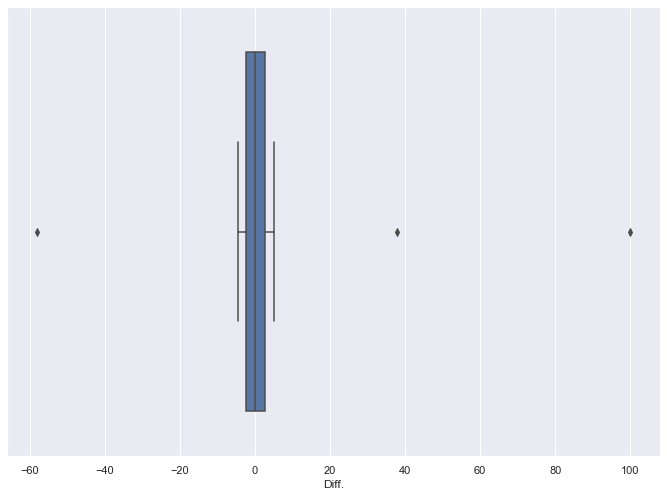

In [841]:
sns.boxplot(Moving_Average["Diff."]);


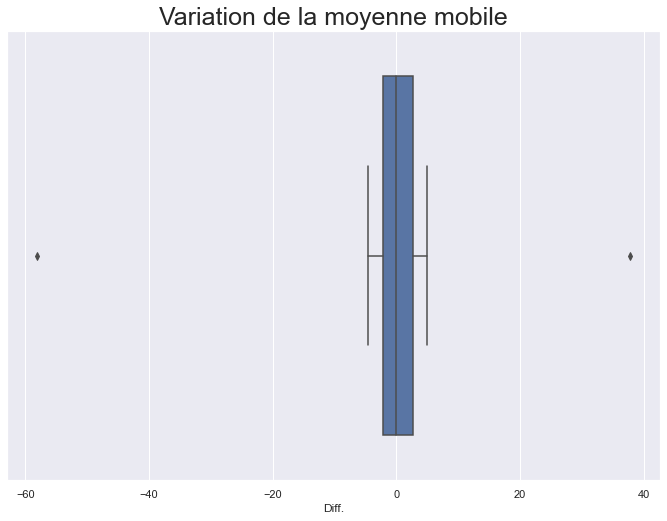

In [842]:
sns.boxplot(x=Moving_Average["Diff."][2:])
plt.title("Variation de la moyenne mobile", size=25);

C:\Users\melle\AppData\Local\Temp/ipykernel_5832/1147984643.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Moving_Average.date_courte, rotation="vertical", size=8)


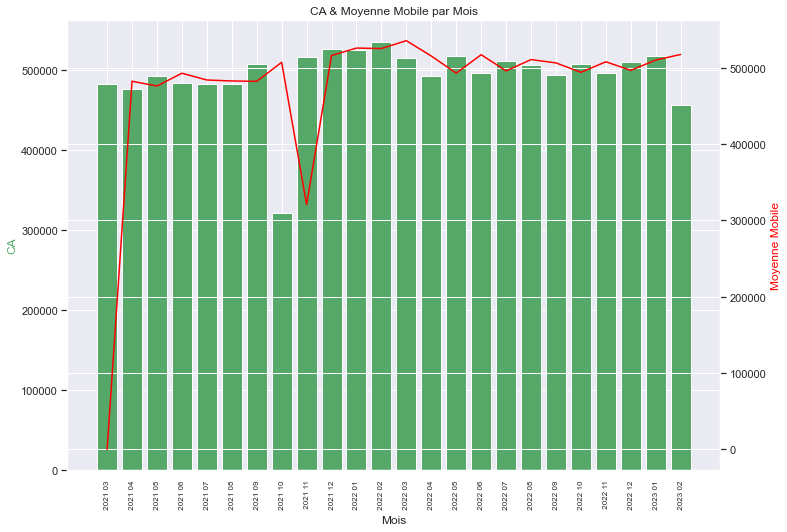

In [843]:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Moving_Average.date_courte, Moving_Average.CA, color='g')
ax2.plot(Moving_Average.date_courte, Moving_Average.Moyenne_Mobile, 'red')

ax1.set_xlabel("Mois")
ax1.set_ylabel("CA", color='g')
ax1.set_xticklabels(Moving_Average.date_courte, rotation="vertical", size=8)

ax2.set_ylabel("Moyenne Mobile", color="red")
plt.title("CA & Moyenne Mobile par Mois")
plt.show()


In [844]:
# Test analyse moyenne mobile sans oct et sept

In [845]:
Moving_Average2 = Moving_Average["Diff."][2:]
Moving_Average2 = Moving_Average2.drop(index=[8,9])
Moving_Average2

2    -1.318217
3     3.401495
4    -1.831108
5    -0.266128
6    -0.103118
7     4.924983
10    1.847488
11   -0.114118
12    1.922076
13   -3.901474
14   -4.547455
15    4.669400
16   -4.275877
17    2.900740
18   -0.860405
19   -2.497338
20    2.719138
21   -2.263003
22    2.645857
23    1.416437
Name: Diff., dtype: float64

In [846]:
print("var:{}".format(((Moving_Average["Diff."][2:]).var().round(2))))
print("moyenne:{}".format((Moving_Average["Diff."][2:]).mean().round(2)))
print("max:{}".format((Moving_Average["Diff."][2:]).max().round(2)))
print("min:{}".format((Moving_Average["Diff."][2:]).min().round(2)))

var:236.2
moyenne:-0.72
max:37.85
min:-58.12


In [847]:
print("Données générale")
print("var:{}".format(((Moving_Average["Diff."][2:]).var().round(2))))
print("moyenne:{}".format((Moving_Average["Diff."][2:]).mean().round(2)))
print("mediane : {}".format((Moving_Average["Diff."][2:]).median().round(2)))
print("max:{}".format((Moving_Average["Diff."][2:]).max().round(2)))
print("min:{}".format((Moving_Average["Diff."][2:]).min().round(2)))

print("Var : {}".format((Moving_Average["Diff."][2:]).var(ddof=0).round(2)))
print("Ect: {}".format((Moving_Average["Diff."][2:]).std(ddof=0).round(2)))
print("skewness: {}".format((Moving_Average["Diff."][2:]).skew().round(2)))
print("kurtosis: {}".format((Moving_Average["Diff."][2:]).kurtosis().round(2)))

Données générale
var:236.2
moyenne:-0.72
mediane : -0.11
max:37.85
min:-58.12
Var : 225.46
Ect: 15.02
skewness: -1.9
kurtosis: 11.38


In [848]:
print("Données sans Outliers: 10-11/2021")
print("var:{}".format(((Moving_Average2).var().round(2))))
print("moyenne:{}".format((Moving_Average2).mean().round(2)))
print("mediane : {}".format(df_final.price.median()))
print("max:{}".format((Moving_Average2).max().round(2)))
print("min:{}".format((Moving_Average2).min().round(2)))

print("Var : {}".format(Moving_Average2.var(ddof=0).round(2)))
print("Ect: {}".format(Moving_Average2.std(ddof=0).round(2)))
print("skewness: {}".format(Moving_Average2.skew().round(2)))
print("kurtosis: {}".format(Moving_Average2.kurtosis().round(2)))

Données sans Outliers: 10-11/2021
var:8.42
moyenne:0.22
mediane : 13.99
max:4.92
min:-4.55
Var : 8.0
Ect: 2.83
skewness: -0.08
kurtosis: -1.04


## Le client

### Panier moyen

In [849]:
CA_genre

,date_longue,sex,price
0,2021-03-01,f,7897.55
1,2021-03-01,m,8678.31
2,2021-03-02,f,8877.50
3,2021-03-02,m,6619.59
4,2021-03-03,f,7610.39
...,...,...,...
1455,2023-02-26,m,9277.63
1456,2023-02-27,f,9881.67
1457,2023-02-27,m,9289.14
1458,2023-02-28,f,8721.06


In [850]:
CA_génération

,génération,CA,Visites,Ventes
0,"(0, 30]",3294902.03,79858,2283
1,"(30, 50]",5538635.91,419198,3134
2,"(50, 100]",3022541.78,180276,2855


In [851]:
CA_génération["CA"][0]

3294902.03

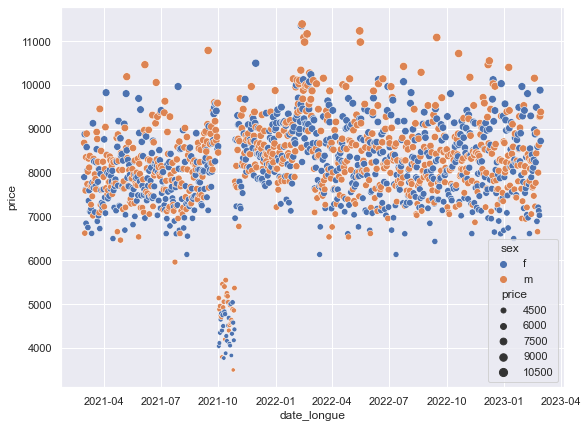

In [852]:
plt.figure(figsize=(9,7))
sns.scatterplot( data= CA_genre,
               x="date_longue", y="price",
               hue="sex",
               size="price");

In [853]:
CA_génération

,génération,CA,Visites,Ventes
0,"(0, 30]",3294902.03,79858,2283
1,"(30, 50]",5538635.91,419198,3134
2,"(50, 100]",3022541.78,180276,2855


In [854]:


print("Il y a {} clients sur la plateforme de vente.".format(len(CA_client_id)) )
print("Sans compter les {} clients sans achats.".format(len(client_sans_achat)) )
print("")
print("Le CA des hommes s'élève à {} €".format(CA_genre1["price"][0]), ", soit {:.2%} du CA total.".format(CA_genre1["price"][0]/(CA_genre1["price"][0] + CA_genre1["price"][1])))
print("Le CA des femme s'élève à {} €".format(CA_genre1["price"][1]), ", soit {:.2%} du CA total.".format(CA_genre1["price"][1]/(CA_genre1["price"][0] + CA_genre1["price"][1])))
print("")
print("Les clients ont entre {} ans".format(df_final.age.min()),"et {} ans".format(df_final.age.max()))
print("Les Moins de 30 ans cumulent un CA de {} €".format(CA_génération["CA"][0]), ", soit {:.2%} du CA Total".format(CA_génération["CA"][0]/df_final["price"].sum()))
print("Les 30-50 ans cumulent un CA de {} €".format(CA_génération["CA"][1]), ", soit {:.2%} du CA Total".format(CA_génération["CA"][1]/df_final["price"].sum()))
print("Les 51 et plus cumulent un CA de {} €".format(CA_génération["CA"][2]), ", soit {:.2%} du CA Total".format(CA_génération["CA"][2]/df_final["price"].sum()))
print("")
print("Les {} ans".format(CA_génération["génération"][0]), ",sont peu actifs, avec {} sessions d'achat".format(CA_génération["Visites"][0]),"soit {:.2%} des sessions totale.".format(CA_génération["Visites"][0]/CA_génération["Visites"].sum()))
print("Les {} ans".format(CA_génération["génération"][1]),"avec {} sessions d'achat".format(CA_génération["Visites"][1]), "soit {:.2%} des sessions totale".format(CA_génération["Visites"][1]/CA_génération["Visites"].sum()))
print("Les {} ans".format(CA_génération["génération"][2]),"avec {} sessions d'achat".format(CA_génération["Visites"][2]), "soit {:.2%} des sessions totale.".format(CA_génération["Visites"][2]/CA_génération["Visites"].sum()))

print("")


Il y a 8600 clients sur la plateforme de vente.
Sans compter les 23 clients sans achats.

Le CA des hommes s'élève à 5995151.92 € , soit 50.57% du CA total.
Le CA des femme s'élève à 5860927.8 € , soit 49.43% du CA total.

Les clients ont entre 18 ans et 93 ans
Les Moins de 30 ans cumulent un CA de 3294902.03 € , soit 27.79% du CA Total
Les 30-50 ans cumulent un CA de 5538635.91 € , soit 46.72% du CA Total
Les 51 et plus cumulent un CA de 3022541.78 € , soit 25.49% du CA Total

Les (0, 30] ans ,sont peu actifs, avec 79858 sessions d'achat soit 11.76% des sessions totale.
Les (30, 50] ans avec 419198 sessions d'achat soit 61.71% des sessions totale
Les (50, 100] ans avec 180276 sessions d'achat soit 26.54% des sessions totale.



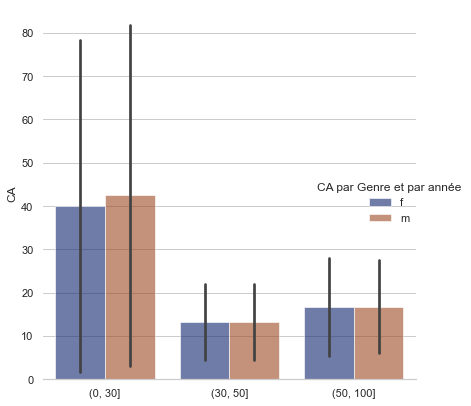

In [855]:
sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_final, kind="bar",
    x="génération", y="price", hue="sex",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "CA")
g.legend.set_title("CA par Genre et par année")




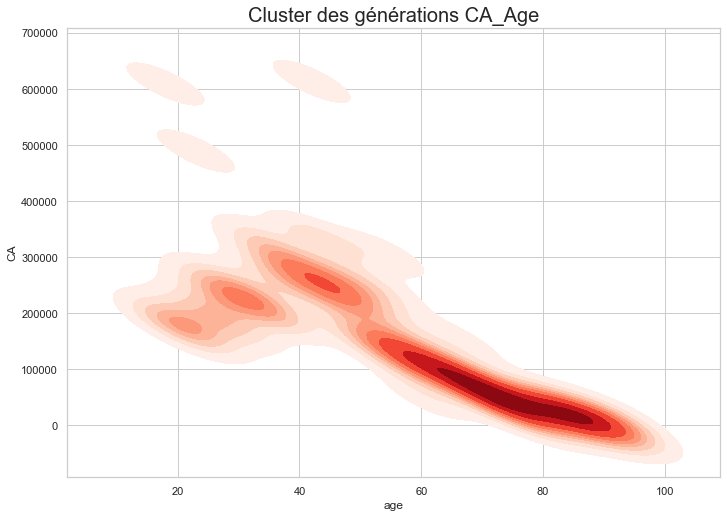

In [856]:
sns.kdeplot(x=CA_age.age, y=CA_age.CA, cmap="Reds", shade=True, bw_adjust=.5)
plt.title("Cluster des générations CA_Age", size=20)
plt.show()

In [857]:
CA_génération

,génération,CA,Visites,Ventes
0,"(0, 30]",3294902.03,79858,2283
1,"(30, 50]",5538635.91,419198,3134
2,"(50, 100]",3022541.78,180276,2855


In [858]:
df_final.columns

Index(['client_id', 'birth', 'sex', 'age', 'id_prod', 'price', 'categ',
       'session_id', 'date_longue', 'date_courte', 'date_année', 'num_semaine',
       'génération', 'type_client'],
      dtype='object')

In [859]:
CA_génération=df_final.groupby("génération").agg({"price":"sum","session_id":"count", "id_prod": lambda x: x.nunique()}).round(2)
CA_génération = CA_génération.reset_index()

CA_génération = CA_génération.rename(columns={"price":"CA"})
CA_génération = CA_génération.rename(columns={"session_id":"Visites"})
CA_génération = CA_génération.rename(columns={"id_prod":"Ventes"})
CA_génération

,génération,CA,Visites,Ventes
0,"(0, 30]",3294902.03,79858,2283
1,"(30, 50]",5538635.91,419198,3134
2,"(50, 100]",3022541.78,180276,2855


In [860]:
CA_génération.columns

Index(['génération', 'CA', 'Visites', 'Ventes'], dtype='object')

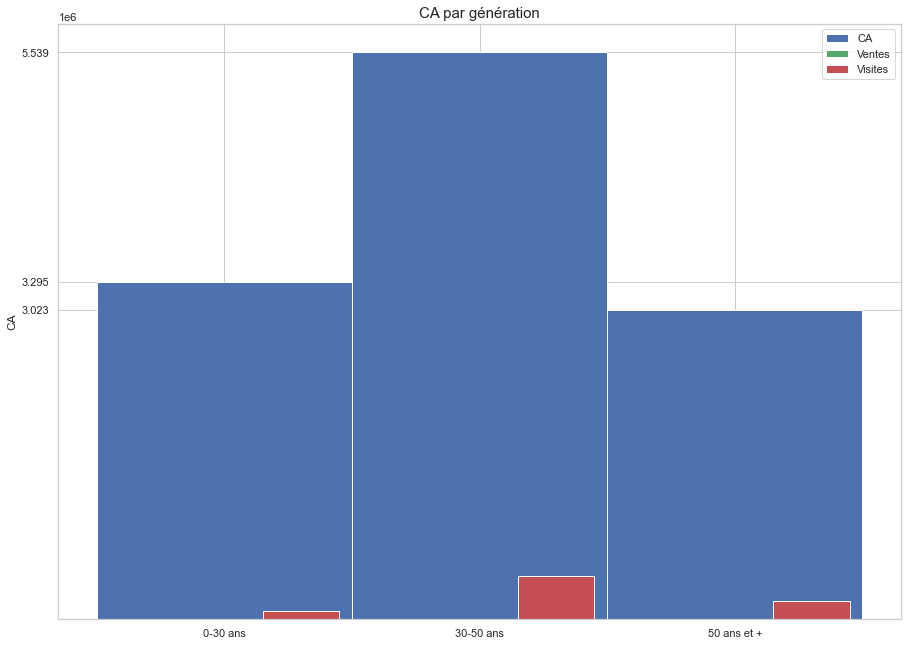

''

In [861]:
fig = plt.figure()
ax = fig.add_axes([0,1,1,1])
X = np.arange(3)
ax.bar(X + 0.00, CA_génération["CA"].values, color = 'b', width = 1)
ax.bar(X + 0.20, CA_génération["Ventes"], color = 'g', width = 0.20)
ax.bar(X + 0.30, CA_génération["Visites"], color = 'r', width = 0.30)

ax.set_ylabel('CA')
ax.set_title('CA par génération', size=15)
ax.set_xticks(X, ('0-30 ans', '30-50 ans', '50 ans et +'))
ax.legend(labels=['CA','Ventes','Visites'])
plt.yticks(CA_génération["CA"])

plt.show()
;

In [862]:
CA_age = df_final.groupby(by="age").agg({"price":"sum","session_id":"count"}).round(2)
CA_age.reset_index(inplace=True)
effectifs = df_final["age"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["price"]) # création du tableau à partir des modalités
CA_age["nombre_de_reccurence"] = effectifs.values
CA_age = CA_age.sort_values(by="age", ascending=False)
CA_age = CA_age.rename(columns={"price":"CA"})
CA_age = CA_age.rename(columns={"session_id":"Visites"})
CA_age = CA_age.rename(columns={"nombre_de_reccurence":"Ventes"})
CA_age.head(3)

,age,CA,Visites,Ventes
75,93,3221.85,201,170
74,92,4013.87,226,201
73,91,2815.45,170,226


In [863]:
CA_age = CA_age.merge(frequence_age, on="age")
CA_age = CA_age.rename(columns={"price":"CA"})
CA_age.CA = CA_age.CA.round(2)
#CA_age.diff_delai_achat = CA_age.fréquence_d_achat_x.astype("int")
CA_age = CA_age.rename(columns={"fréquence_d_achat_x":"fréquence_d_achat"})
CA_age=CA_age[['age', 'CA', 'Visites', 'Ventes', 'fréquence_d_achat']]
CA_age

,age,CA,CA,Visites,Ventes,fréquence_d_achat
0,93,3221.85,3221.85,201,170,10.233831
1,92,4013.87,4013.87,226,201,11.389381
2,91,2815.45,2815.45,170,226,16.170588
3,90,5043.19,5043.19,311,272,13.045016
4,89,5264.99,5264.99,327,311,13.321101
...,...,...,...,...,...,...
71,22,165029.26,165029.26,4415,23475,18.573726
72,21,178497.70,178497.70,4252,24677,18.650517
73,20,184209.26,184209.26,4587,24893,19.451929
74,19,178195.78,178195.78,4371,25005,20.558453


## Le Produit

## Categ 

In [864]:
CA_id_prod

,id_prod,price,nombre de reccurence
3097,2_159,94893.50,2252
3071,2_135,69334.95,2189
3046,2_112,65407.76,2180
3035,2_102,60736.78,2128
3153,2_209,56971.86,2096
...,...,...,...
665,0_1601,1.99,1
2080,0_807,1.99,1
719,0_1653,1.98,1
313,0_1284,1.38,1


In [865]:
CA_id_prod["id_prod"].value_counts().value_counts()

1    3266
Name: id_prod, dtype: int64

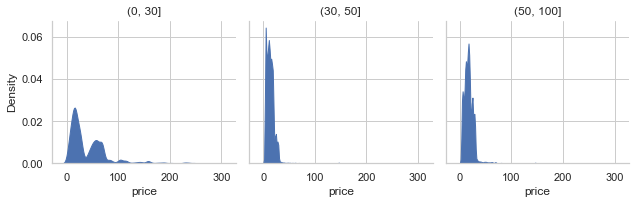

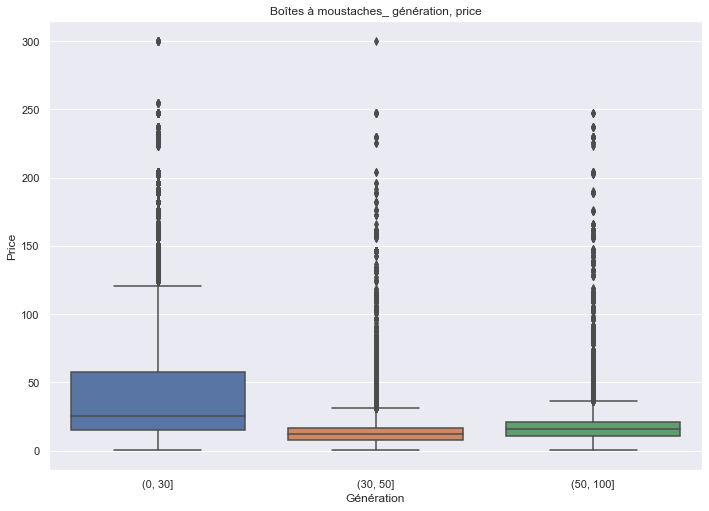

Nombre totale de références: 3266


Le nombre de transactions totales est de: 679332
Le nombre de visites sur le site (session_id) est de: 342315


Catégorie 0:
CA: 4422082.01
Proportion du CA : 37.30%
Le nombre de transaction de la catégorie: 0 : 415680
Avec un panier moyen de: 10.64€


Catégorie 1:
CA: 4653722.69
Proportion du CA : 39.25%
Le nombre de transaction de la catégorie: 1 : 227169
Avec un panier moyen de: 20.49€


Catégorie 2:
CA: 2780275.02
Proportion du CA: 23.45%
Le nombre de transaction de la catégorie: 2 : 36483
Avec un panier moyen de: 76.21€


In [866]:


# set seaborn whitegrid theme
sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(df_final, col='génération', col_wrap=3)

# draw density plots
g = g.map(sns.kdeplot,"price", fill=True, common_norm=True, alpha=1, legend=False)

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

sns.set()
sns.set(rc={'figure.figsize': (11.7,8.27)}) 

ax = sns.boxplot(x="génération", y="price", data=df_final)
plt.xlabel('Génération')
plt.ylabel('Price')
plt.title('Boîtes à moustaches_ génération, price')

plt.show()

print("Nombre totale de références: " + str(df_final["id_prod"].value_counts().value_counts().sum()))
print("")
print("")
print("Le nombre de transactions totales est de: " + str(df_final["price"].value_counts().sum()))
print("Le nombre de visites sur le site (session_id) est de: {}".format(df_final["session_id"].value_counts().value_counts().sum()))
print("")
print("")
print("Catégorie 0:")
print("CA:", "{:.10}".format(CA_categ.T[0]["price"]))
print("Proportion du CA :", "{:.2%}".format(CA_categ["price"][0]/(CA_categ["price"][0]+CA_categ["price"][1]+CA_categ["price"][2])))
print("Le nombre de transaction de la catégorie:", "{}".format(panier_moyen_categ["categ"][0]),": {}".format(len(df_final.loc[df_final["categ"]==0])))
print("Avec un panier moyen de: " "{}€".format(panier_moyen_categ["price"][0]))
print("")
print("")

print("Catégorie 1:")
print("CA:", "{:.10}".format(CA_categ["price"][1]))
print("Proportion du CA :", "{:.2%}".format(CA_categ["price"][1]/(CA_categ["price"][0]+CA_categ["price"][1]+CA_categ["price"][2])))
print("Le nombre de transaction de la catégorie:", "{}".format(panier_moyen_categ["categ"][1]),": {}".format(len(df_final.loc[df_final["categ"]==1])))
print("Avec un panier moyen de: " "{}€".format(panier_moyen_categ["price"][1]))
print("")
print("")
print("Catégorie 2:")
print("CA:", "{:.10}".format(CA_categ["price"][2]))
print("Proportion du CA:", "{:.2%}".format(CA_categ["price"][2]/(CA_categ["price"][0]+CA_categ["price"][1]+CA_categ["price"][2])))
print("Le nombre de transaction de la catégorie:", "{}".format(panier_moyen_categ["categ"][2]),": {}".format(len(df_final.loc[df_final["categ"]==2])))
print("Avec un panier moyen de: " "{}€".format(panier_moyen_categ["price"][2]))


In [ ]:
#first generate some datapoint for a randomly sampled noisy sinewave
x = df_final["age"]
noise = df_final["price"]
y = np.sin(x) + noise

#plot the data
plt.plot(x,y,'ro',alpha=0.3,ms=4,label='data')
plt.xlabel('Time')
plt.ylabel('Intensity')

#define a moving average function
def moving_average(x,y,step_size=.1,bin_size=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        items_in_bin = y[(x>(bin_center-bin_size*0.5) ) & (x<(bin_center+bin_size*0.5))]
        bin_avg[index] = np.mean(items_in_bin)

    return bin_centers,bin_avg

#plot the moving average
bins, average = moving_average(x,y)
plt.plot(bins, average,label='moving average')
plt.show()

In [ ]:
sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=df_final, kind="bar",
    x="date_année", y="price", hue="categ",
    ci="sd", palette="dark", alpha=.6, height=6,
)
g.despine(left=True)
g.set_axis_labels("Année", "CA")
g.legend.set_title("Catégories");



In [ ]:
labels= CA_categ["categ"]
values=CA_categ["price"]
fig1, ax1 = plt.subplots()
ax1.pie(values, explode=None, labels=labels, autopct='%1.1f%%',
       startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion du CA par categorie", bbox={'facecolor':'0.8', 'pad':5})

plt.show();

labels= CA_categ["categ"]
values=CA_categ["nombre de reccurence"]

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=None, labels=labels, autopct='%1.1f%%',
       startangle=60)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Proportion des ventes par categorie", bbox={'facecolor':'0.8', 'pad':5})

plt.show();

In [ ]:
# Analyse Comparaison semestre 1 2022 - 2023

In [ ]:
df_final.head(3)

In [ ]:
Année_2021 = df_final.loc[df_final["date_année"]=='2021']
Année_2022 = df_final.loc[df_final["date_année"]=='2022']
Année_2023 = df_final.loc[df_final["date_année"]=="2023"]

In [ ]:
trimestre_1_2022 = Année_2022.groupby("date_courte").agg({"price":"sum","session_id":"count"})
trimestre_1_2022 = trimestre_1_2022.rename(columns={"price":"CA"})
trimestre_1_2022 = trimestre_1_2022.rename(columns={"session_id":"Visites"})
trimestre_1_2022.CA = trimestre_1_2022.CA.round(2)
trimestre_1_2022 = trimestre_1_2022[:2]
trimestre_1_2022.reset_index(inplace=True)
trimestre_1_2022

In [ ]:
trimestre_1_2023 = Année_2023.groupby("date_courte").agg({"price":"sum","session_id":"count"})
trimestre_1_2023 = trimestre_1_2023.rename(columns={"price":"CA"})
trimestre_1_2023 = trimestre_1_2023.rename(columns={"session_id":"Visites"})
trimestre_1_2023.CA = trimestre_1_2023.CA.round(2)
trimestre_1_2023.reset_index(inplace=True)
trimestre_1_2023

In [ ]:
#Janvier CA
VA = trimestre_1_2023["CA"][0]
VD = trimestre_1_2022["CA"][0]
evolution_janvier = (VA-VD)/VD*100
evolution_janvier = evolution_janvier.round(2)
print("Comparaison - Evolution du CA pour le mois de janvier 22 et 23:", "{}%".format(evolution_janvier))



#Janvier Visites
VA = trimestre_1_2023["Visites"][0]
VD = trimestre_1_2022["Visites"][0]
evolution_janvier = (VA-VD)/VD*100
evolution_janvier = evolution_janvier.round(2)
print("Comparaison - Evolution du Visites pour le mois de janvier 22 et 23:", "{}%".format(evolution_janvier))



In [ ]:

#Février CA
VA2 = trimestre_1_2023["CA"][1]
VD2 = trimestre_1_2022["CA"][1]
evolution_fev = (VA2-VD2)/VD2*100
evolution_fev = evolution_fev.round(2)
print("Comparaison - Evolution du CA pour le mois de Février 22 et 23:", "{}%".format(evolution_fev))


#Février Visites
VA2 = trimestre_1_2023["Visites"][1]
VD2 = trimestre_1_2022["Visites"][1]
evolution_fev = (VA2-VD2)/VD2*100
evolution_fev = evolution_fev.round(2)
print("Comparaison - Evolution du Visites pour le mois de Février 22 et 23:", "{}%".format(evolution_fev))


In [ ]:
Trimestre_2022 = CA_mois[9:].head(3)
Trimestre_2022.price = Trimestre_2022.price.round(2)
Trimestre_2022 = Trimestre_2022.rename(columns={"price":"CA"})
Trimestre_2022 = Trimestre_2022.reset_index()
Trimestre_2022 = Trimestre_2022[['date_courte', 'CA', 'Visites']]
Trimestre_2022

In [ ]:
Trimestre_2022.columns

In [ ]:
Trimestre_2023 = CA_mois[21:].head(3)
Trimestre_2023.price = Trimestre_2023.price.round(2)
Trimestre_2023 = Trimestre_2023.rename(columns={"price":"CA"})
Trimestre_2023 = Trimestre_2023.reset_index()
Trimestre_2023 = Trimestre_2023[['date_courte', 'CA', 'Visites']]
Trimestre_2023

In [ ]:
vertical_concat = pd.concat([Trimestre_2022, Trimestre_2023], axis=0)
vertical_concat

In [ ]:
vertical_concat.T

In [ ]:
#eVOLUTION DU CA TRIMESTRE / TRIMESTRE
VA = Trimestre_2023["CA"].sum()
VD = Trimestre_2022["CA"].sum()
evolution_dec = (VA-VD)/VD*100
evolution_dec = evolution_dec.round(2)
print("Comparaison - Evolution du CA:", "{}%".format(evolution_dec))


#eVOLUTION DES VISITES TRIMESTRE / TRIMESTRE
VA2 = Trimestre_2023["Visites"].sum()
VD2 = Trimestre_2022["Visites"].sum()
evolution_dec2 = (VA2-VD2)/VD2*100
evolution_dec2 = evolution_dec2.round(2)
print("Comparaison - Evolution du Visites:", "{}%".format(evolution_dec2))


In [ ]:
#Dec CA
VA = Trimestre_2023["CA"][0]
VD = Trimestre_2022["CA"][0]
evolution_dec = (VA-VD)/VD*100
evolution_dec = evolution_dec.round(2)
print("Comparaison - Evolution du CA pour le mois de Décembre 22 et 23:", "{}%".format(evolution_dec))


#Dec Visites
VA2 = Trimestre_2023["Visites"][1]
VD2 = Trimestre_2022["Visites"][1]
evolution_dec2 = (VA2-VD2)/VD2*100
evolution_dec2 = evolution_dec2.round(2)
print("Comparaison - Evolution du Visites pour le mois de Décembre 22 et 23:", "{}%".format(evolution_dec2))


In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Trimestre_2022.date_courte, Trimestre_2022.CA, color='y')
ax2.plot(Trimestre_2022.date_courte, Trimestre_2022.Visites, 'red')

ax1.set_xlabel("Mois", size=20)
ax1.set_ylabel("CA", color='y', size=20)
ax1.set_xticklabels(Trimestre_2022.date_courte, size=20)

ax2.set_ylabel("Nombre de Visites", color="red", size=20)
plt.title(" Dec, Jan, Fev 2022 _ CA & Nombre de visites par Mois",size=20)
plt.show()


In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Trimestre_2023.date_courte, Trimestre_2023.CA, color='y')
ax2.plot(Trimestre_2023.date_courte, Trimestre_2023.Visites, 'red')

ax1.set_xlabel("Mois", size=20)
ax1.set_ylabel("CA", color='y', size=20)
ax1.set_xticklabels(Trimestre_2023.date_courte, size=20)

ax2.set_ylabel("Nombre de Visites", color="red", size=20)
plt.title(" Dec, Jan, Fev 2023 _ CA & Nombre de visites par Mois", size=20)
plt.show()


### Le Site

### indice de vente

In [ ]:
#                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Indice des ventes = Nombre d'articles vendus / nombre de tickets de caisse.
indice_de_vente_g = df_final.groupby(["génération"]).agg({"id_prod":"count", "session_id":"count"})
indice_de_vente_g.reset_index(inplace=True)
indice_de_vente_g = indice_de_vente_g.query("id_prod > 0")
indice_de_vente_g

In [ ]:
indice_de_vente =  df_final.groupby(by=["génération","session_id"]).agg({"id_prod":"count","price":"mean"})


indice_de_vente["price"] = indice_de_vente["price"].round(2)
indice_de_vente = indice_de_vente.rename(columns={"price":"Panier_Moyen"})
indice_de_vente = indice_de_vente.rename(columns={"id_prod":"Nombre_de_ventes"})
indice_de_vente = indice_de_vente.reset_index()
indice_de_vente.dropna(inplace=True)
indice_de_vente.head()

In [ ]:
sns.set()
sns.set(rc={'figure.figsize': (11.7,8.27)}) 

ax = sns.boxplot(x="génération", y="Nombre_de_ventes", data=indice_de_vente)
plt.xlabel('Génération')
plt.ylabel('Nombre_de_ventes')
plt.title('Boîtes à moustaches des génération selon le Nombre_de_ventes')

plt.show()


### Session id = Visiteur

In [ ]:
visite_génération = df_final.groupby("génération").agg({"session_id":"count"})
visite_génération = visite_génération.reset_index()
visite_génération

In [ ]:
visite_categ = df_final.groupby("categ").agg({"session_id":"count"})
visite_categ = visite_génération.reset_index()
visite_categ

In [ ]:
import matplotlib.pyplot as plt

label = "REPARTITION VISITES PAR CATEGORIE"
labels = "0", "1","2"
sizes = [ visite_categ["session_id"][0], visite_categ["session_id"][1],visite_categ["session_id"][2]]
explode = (0, 0,0)  # seulement "explode" Buttom10 (i.e. 'Buttom10')


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=40)
ax1.axis('equal')  # Traitement des ratio pour obtenir un cercle.

plt.title(label , fontdict=None, loc=None, pad=True, y=None,fontweight="bold")
fig1.set_size_inches(15, 7)

plt.show()

In [ ]:
CA_session_id =  df_final.groupby(["date_année","date_courte"]).agg({"session_id":"count","price":"mean"})
CA_session_id = CA_session_id.rename(columns={"price":"Panier_Moyen"})
CA_session_id = CA_session_id.rename(columns={"session_id":"Visites"})

CA_session_id["Panier_Moyen"] = CA_session_id["Panier_Moyen"].round(2)
CA_session_id

In [ ]:
CA_session_id_mois =  df_final.groupby("date_courte").agg({"session_id":"count","price":"mean"})
CA_session_id_mois = CA_session_id_mois.rename(columns={"price":"Panier_Moyen"})
CA_session_id_mois = CA_session_id_mois.rename(columns={"session_id":"Visites"})

CA_session_id_mois["Panier_Moyen"] = CA_session_id_mois["Panier_Moyen"].round(2)
CA_session_id_mois

In [ ]:
CA_session_id_jour =  df_final.groupby(by=["date_année","date_longue"]).agg({"price":"mean"})


CA_session_id_jour["price"] = CA_session_id_jour["price"].round(2)
CA_session_id_jour = CA_session_id_jour.rename(columns={"price":"Panier_Moyen"})
CA_session_id_jour = CA_session_id_jour.rename(columns={"date_longue":"Date"})
CA_session_id_jour = CA_session_id_jour.rename(columns={"session_id":"Visites"})
CA_session_id_jour = CA_session_id_jour.reset_index()
#CA_session_id_jour['date_année'] = CA_session_id_jour['date_année'].dt.strftime('%Y')
#CA_session_id_jour['date_longue'] = CA_session_id_jour['date_longue'].dt.strftime('%d/%m/%Y')

CA_session_id_jour.head()

In [ ]:
CA_session_id_mois

In [ ]:

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
#ax3 = ax1.twinx()

ax1.plot(CA_session_id_mois.index, CA_session_id_mois.Panier_Moyen, color='g')
ax2.plot(CA_session_id_mois.index, CA_session_id_mois.Visites, 'black')


ax1.set_ylabel("Panier_Moyen", color='g',size=15)
ax1.set_xticklabels(CA_session_id_mois.index, rotation="vertical", size=8)

ax2.set_ylabel("Visites", color="black",size=15)
plt.title("Panier Moyen & Visites par Mois",size=20)
plt.show()


In [ ]:
CA_session_id_jour

In [ ]:
CA_session_id_m =  df_final.groupby("date_courte").agg({"price":"mean","session_id":lambda x: x.nunique(),"id_prod":lambda x: x.nunique()})
CA_session_id_m = CA_session_id_m.rename(columns={"session_id":"Visites"})
CA_session_id_m = CA_session_id_m.rename(columns={"price":"Panier_Moyen"})
CA_session_id_m = CA_session_id_m.rename(columns={"id_prod":"Références_vendues"})
CA_session_id_m["Panier_Moyen"] = CA_session_id_m["Panier_Moyen"].round(2)
CA_session_id_m.reset_index(inplace=True)
CA_session_id_m

In [ ]:
CA_session_id_année =  df_final.groupby("date_année").agg({"price":"mean","session_id":lambda x: x.nunique(),"id_prod":lambda x: x.nunique()})
CA_session_id_année = CA_session_id_année.rename(columns={"session_id":"Visites"})
CA_session_id_année = CA_session_id_année.rename(columns={"price":"Panier_Moyen"})
CA_session_id_année = CA_session_id_année.rename(columns={"id_prod":"Références_vendues"})
CA_session_id_année["Panier_Moyen"] = CA_session_id_année["Panier_Moyen"].round(2)
CA_session_id_année.reset_index(inplace=True)
CA_session_id_année

In [ ]:
CA_session_id_m.sample(3)

In [ ]:
print("Le panier moyen mensuel est de {}".format(CA_session_id.Panier_Moyen.mean().round(2)))
print("La moyenne mensuelle de visites est de {}".format(CA_session_id.Visites.mean().round(2)))

In [ ]:
CA_session_id_m.columns

In [ ]:
panier_moyen_client_id =  df_final.groupby(by=["client_id"]).agg({"price":"mean"})
panier_moyen_client_id = panier_moyen_client_id.reset_index() 
panier_moyen_client_id["price"] = panier_moyen_client_id["price"].round(2)
panier_moyen_client_id = panier_moyen_client_id.sort_values(by="price", ascending = False)
panier_moyen_client_id.head()

## TOP / FLOP

In [ ]:
# Client avec le plus de commande
Commande_TOP = CA_client_id.nlargest(10, ['nombre de reccurence'])
Commande_TOP

In [ ]:
# Client avec le moins de commande
Commande_FLOP = CA_client_id.nsmallest(10, ['nombre de reccurence'])
Commande_FLOP

In [ ]:
# Client au plus gros CA
CA_client_id_TOP = CA_client_id.nlargest(10, ['price'])
CA_client_id_TOP

In [ ]:
# Client au plus petit CA
CA_client_id.nsmallest(10, ['price']) 

In [ ]:
# id_prod au plus gros CA
CA_id_prod.nlargest(10, ['price']) 

In [ ]:
# id_prod au plus petit CA
CA_id_prod.nsmallest(10, ['price']) 

In [ ]:
# id_prod au plus gros nombre de reccurence
CA_id_prod.nlargest(10, ['nombre de reccurence']) 

In [ ]:
# id_prod au plus petit nombre de reccurence
CA_id_prod.nsmallest(10, ['nombre de reccurence']) 

In [ ]:
CA_age

In [ ]:
# TOP10 des clients qui ont la date de dernier achat la plus lointaine
frequence_client.nlargest(n=10, columns=["fréquence_d_achat"])

In [ ]:
# TOP10 des clients qui ont la date de dernier achat la plus proche
frequence_client.nsmallest(n=10, columns=["fréquence_d_achat"])

In [ ]:
# Client qui effectuent plusieurs achats par session, montant des achats et nombre de produits achetés
x = frequence_client.loc[frequence_client["fréquence_d_achat"]==0]
x = x.groupby("client_id").agg({"price":"sum","id_prod":"count"})
x